<a href="https://colab.research.google.com/github/Tanvi3Mane/CustomerSegmentation_RiskAnalytics/blob/main/Binary_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TABLE OF CONTENTS**

>[UPLOADING FILES](#scrollTo=M1wuH8oqCSVB)

>[IMPORTING PACKAGES](#scrollTo=4lVXqkbRDSdl)

>[READING DATA FROM CSV FILES](#scrollTo=kePHYTzFafJl)

>[MERGING DATA](#scrollTo=QmeETzCOjBXS)

>[TARGET VARIABLE CREATION](#scrollTo=4s4WSgX4KQ6Q)

>>[Setting target variable](#scrollTo=OeT6Z2wSNUIl)

>[ITERATION 1- LOGISTIC REGRESSION MODEL TRAINING](#scrollTo=Z81EOPmWgBXE)

>>>[Creating X and Y data](#scrollTo=DE9SCvIFo6r_)

>>>[Dividing X and Y in training and testing data. Ration - 70:30](#scrollTo=rqr2oPg6pAWe)

>>[Training model](#scrollTo=lZ4UEpAGgFvy)

>>>[Training Logistic Regression model with imbalanced data](#scrollTo=_37pE9Dtp2Vt)

>>>[Training Logistic Regression model with Unscaled and Balanced data with SMOTE](#scrollTo=6jtlb3pGpQFs)

>[ITERATION 1- CORRELATION MATRIX & P VALUES](#scrollTo=B3H_jOwXAQ1l)

>>[Correlation matrix](#scrollTo=OldLr-q5P3XV)

>>[Pvalue](#scrollTo=AmP6OxO943rI)

>[ITERATION 1: TESTING & CONCLUSION](#scrollTo=vwoC_nT_BnBs)

>>[Reading dec csv file in df_dec](#scrollTo=Mgauog0gsI-T)

>>[Testing](#scrollTo=scsCVlvZv_qe)

>>[CONCLUSION:](#scrollTo=kNFoP9FdR20-)

>[ITERATION 2 - Can I find out accurately only by looking at August data if customer will go high risk in November?](#scrollTo=HiDkTeGobP-u)

>>[Creating training dataset again using only august data](#scrollTo=Yq7C4TZx96at)

>>[Training model on balanced data and displaying metrics](#scrollTo=Fsc1qshL-U4K)

>>[Testing model](#scrollTo=A9zcaUusCYwG)

>[ITERATION 3 - Adding significant variables](#scrollTo=55-KchskZcVz)

>>[CONCLUSION:](#scrollTo=S7PcaUt7u1MO)

>[CONCLUSION](#scrollTo=n_7SdeLFFRVS)



# UPLOADING FILES

Run the code below. You will get an option to upload csv files. Select all csv files to upload from the data files provided.

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Aug.csv to Aug.csv
Saving Dec.csv to Dec.csv
Saving Nov.csv to Nov.csv
Saving Oct.csv to Oct.csv
Saving Sept.csv to Sept.csv
Saving TPSAugSepOct_SigVars_Final.csv to TPSAugSepOct_SigVars_Final (1).csv


Now, you have all the files you need to run this google colab code file.

# IMPORTING PACKAGES

Here, we import all the python packages that we need through this file and to complete our analysis

In [ ]:
# Importing packages

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
%matplotlib inline

In [ ]:
# Importing packages

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import seaborn as sns

We have successfully imported the following python libraries: Pandas, Scikit Learn, Matplotlib, Numpy, Seaborn

# READING DATA FROM CSV FILES

In this section,we are reading all the csv file data to pandas dataframe to enable analysis

Reading August data from 'aug.csv' to a dataframe named as 'df_aug'

In [ ]:
df_aug = pd.read_csv('Aug.csv')

# Renaming customer name column to cust_name
df_aug.rename(columns = {'Customer Name':'Cust_Name'}, inplace = True)

# Dropping any duplicates that might exist in August data
df_aug=df_aug.drop_duplicates(subset=['Cust_Name'])

# The numeric columns have ',' symbol which needs to be removed.
# Also, the datatype of these columns needs to set to 'FLOAT'
# Selecting all columns except the Cust_Name column
cols_to_convert = df_aug.columns.drop('Cust_Name')
cols_to_convert

# Remove commas from the selected columns
df_aug[cols_to_convert] = df_aug[cols_to_convert].replace(',', '', regex=True)

# Assigning float datatype
df_aug[cols_to_convert] = df_aug[cols_to_convert].astype(float)

# Print the resulting dataframe
df_aug

,Cust_Name,Aug_Current,Aug_30_Days,Aug_60_Days,Aug_90_Days,Aug_120_Days,Aug_150_Days,Aug_180_Days,Aug_Over_180_Days,Aug_Unapplied_Pmt,Aug_Open_Amt,Aug_Orig_Amt,Aug_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,43065.11,43065.11,47675.21
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.00,0.00,0.00,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,442475.85,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,442475.85,442475.85,61130.65
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,52.43,0.00,0.00,0.0,0.00,0.00,0.00,52.43,52.43,104.94
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,494.24,494.24,395.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29419,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,32.05,32.05,1467.48
29420,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-155.32,0.00,-155.32,-155.32,142.68
29421,970 SERVICES 970242,25211.57,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,25211.57,25211.57,22432.29
29422,@ HOME BUILDERS LLC 001145,397523.28,74439.37,9120.47,-410.87,-2100.73,0.0,-2015.46,7306.52,-6853.32,477009.26,224493.91,0.00


Reading September data from 'sept.csv' to a dataframe named as 'df_sept'

In [ ]:
df_sept = pd.read_csv('Sept.csv')

# Renaming customer name column to cust_name
df_sept.rename(columns = {'Customer Name':'Cust_Name'}, inplace = True)

# Dropping any duplicates that might exist in data
df_sept=df_sept.drop_duplicates(subset=['Cust_Name'])

# The numeric columns have ',' symbol which needs to be removed.
# Also, the datatype of these columns needs to set to 'FLOAT'
# Selecting all columns except the Cust_Name column
cols_to_convert = df_sept.columns.drop('Cust_Name')
cols_to_convert

# Remove commas from the selected columns
df_sept[cols_to_convert] = df_sept[cols_to_convert].replace(',', '', regex=True)

# Assigning float datatype
df_sept[cols_to_convert] = df_sept[cols_to_convert].astype(float)

# Print the resulting dataframe
df_sept

,Cust_Name,Sept_Current,Sept_30_Days,Sept_60_Days,Sept_90_Days,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days,Sept_Unapplied_Pmt,Sept_Open_Amt,Sept_Orig_Amt,Sept_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,39385.40,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,39385.40,39385.40,55233.36
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,178.58,0.00,0.00,0.00,0.0,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,477032.56,589.80,0.00,0.00,0.00,0.00,0.0,0.00,0.00,477622.36,477621.61,15717.26
3,A AND J ROOFING CONTRACTORS AAN113,8073.84,0.00,0.00,52.43,0.00,0.00,0.0,0.00,0.00,8126.27,8126.27,104.94
4,A AND J VELASQUEZ ROOFING S007756,4807.62,494.24,0.00,0.00,0.00,0.00,0.0,0.00,0.00,5301.86,5301.86,395.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30252,917 CHITTOCK STREET LLC 917CHI,2108.37,32.05,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2140.42,2140.42,1467.48
30253,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-155.32,0.00,-155.32,-155.32,142.68
30254,970 SERVICES 970242,46428.96,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,46428.96,46429.06,44.96
30255,@ HOME BUILDERS LLC 001145,599663.97,177443.41,25157.40,9568.67,-410.87,-2100.73,0.0,9096.28,-12318.60,806099.53,588446.50,40505.34


Reading October data from 'oct.csv' to a dataframe named as 'df_oct'

In [ ]:
df_oct = pd.read_csv('Oct.csv')

# Renaming customer name column to cust_name
df_oct.rename(columns = {'Customer Name':'Cust_Name'}, inplace = True)

# Dropping any duplicates that might exist in data
df_oct=df_oct.drop_duplicates(subset=['Cust_Name'])

# The numeric columns have ',' symbol which needs to be removed.
# Also, the datatype of these columns needs to set to 'FLOAT'
# Selecting all columns except the Cust_Name column
cols_to_convert = df_oct.columns.drop('Cust_Name')
cols_to_convert

# Remove commas from the selected columns
df_oct[cols_to_convert] = df_oct[cols_to_convert].replace(',', '', regex=True)

# Assigning float datatype
df_oct[cols_to_convert] = df_oct[cols_to_convert].astype(float)

# Print the resulting dataframe
df_oct

,Cust_Name,Current,Oct_30_Days,Oct_60_Days,Oct_90_Days,Oct_120_Days,Oct_150_Days,Oct_180_Days,Oct_Over_180_Days,Oct_Unapplied_Pmt,Oct_Open_Amt,Oct_Orig_Amt,Oct_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,90211.30,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,90211.30,90211.30,14.79
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,0.00,178.58,0.00,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,264004.79,125246.98,589.80,0.00,0.00,0.0,0.00,0.00,0.00,389841.57,389841.48,164.21
3,A AND J ROOFING CONTRACTORS AAN113,462.32,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,462.32,462.32,8127.27
4,A AND R TOTAL EXTERIORS LLC S003692,8688.91,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8688.91,8688.91,27145.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29728,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-155.32,0.00,-155.32,-155.32,142.68
29729,970 SERVICES 970242,36292.25,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,36292.25,36292.25,17088.67
29730,98 BUILDERS INC S011369,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-10.82,-10.82,-10.82,142.66
29731,@ HOME BUILDERS LLC 001145,421327.90,50329.70,1867.45,1261.84,11793.83,149.1,193.99,6147.45,-11624.85,481446.41,320166.40,218839.67


Reading November data from 'nov.csv' to a dataframe named as 'df_nov'

In [ ]:
# Reading nov data in df_nov dataframe first
df_nov = pd.read_csv('Nov.csv')

# The numeric columns have ',' symbol which needs to be removed.
# Also, the datatype of these columns needs to set to 'FLOAT'
# Selecting all columns except the Cust_Name colum
cols_to_convert = df_nov.columns.drop('Cust_Name')
cols_to_convert

# Remove commas from the selected columns
df_nov[cols_to_convert] = df_nov[cols_to_convert].replace(',', '', regex=True)

df_nov[cols_to_convert] = df_nov[cols_to_convert].astype(float)

# Print the resulting dataframe
df_nov

,Cust_Name,Nov_Current,Nov_30_Days,Nov_60_Days,Nov_90_Days,Nov_120_Days,Nov_150_Days,Nov_180_Days,Nov_Over_180_Days,Nov_Unapplied_Pmt,Nov_Open_Amt,Nov_Orig_Amt,Nov_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,17095.15,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,17095.15,17095.15,89476.23
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,0.00,178.58,0.00,0.00,0.0,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,376338.69,18704.28,0.00,0.00,0.00,0.00,0.0,0.00,0.00,395042.97,395042.97,2984.39
3,A AND J ROOFING CONTRACTORS AAN113,-48.68,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-48.68,-48.68,462.32
4,A AND R TOTAL EXTERIORS LLC S003692,97.25,8688.91,0.00,0.00,0.00,0.00,0.0,0.00,0.00,8786.16,8786.16,27145.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29332,917 CHITTOCK STREET LLC 917CHI,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.00,2140.42
29333,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-155.32,0.00,-155.32,-155.32,370.27
29334,970 SERVICES 970242,16759.41,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,16759.41,16759.41,29340.29
29335,@ HOME BUILDERS LLC 001145,483258.13,97381.23,50105.45,230.05,1241.85,11756.03,96.2,4382.46,-9527.04,638924.36,453743.60,224.25


# MERGING DATA
MERGING DATA FROM AUG,SEPT, OCT TOGETHER TO FORM A SINGLE DATAFRAME NAMED DF_CUST. This will be used for Training the mode

In [ ]:
# Merging August, September, October data together

df_cust=pd.merge(pd.merge(df_aug, df_sept, on = 'Cust_Name'),df_oct, on = 'Cust_Name')

In [ ]:
# merge the dataframes on the cust_id column
merged_df = pd.merge(df_aug, df_sept, on='Cust_Name', how='outer')
df_cust = pd.merge(merged_df, df_oct, on='Cust_Name', how='outer')

# fill missing values with 0
df_cust = df_cust.fillna(0)

df_cust

,Cust_Name,Aug_Current,Aug_30_Days,Aug_60_Days,Aug_90_Days,Aug_120_Days,Aug_150_Days,Aug_180_Days,Aug_Over_180_Days,Aug_Unapplied_Pmt,...,Oct_60_Days,Oct_90_Days,Oct_120_Days,Oct_150_Days,Oct_180_Days,Oct_Over_180_Days,Oct_Unapplied_Pmt,Oct_Open_Amt,Oct_Orig_Amt,Oct_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,90211.30,90211.30,14.79
1,A A WINDOWS 'N' DOORS 100001,178.58,0.0,0.00,0.0,0.0,0.0,0.0,-422.63,-548.1,...,0.0,178.58,0.0,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,442475.85,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,589.8,0.00,0.0,0.0,0.00,0.00,0.00,389841.57,389841.48,164.21
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.0,52.43,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,462.32,462.32,8127.27
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,5TH GENERATION CONTRACTING GEN110,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2442.24,2442.24,11861.03
35992,7400 CONSTRUCTION(COLL) SEV283,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,732.51,0.00,0.00,732.51,9782.61,9050.10
35993,"777 ROOFING & CONSTRUCTION, LL s002548",0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,762.81,762.81,50.90
35994,8 PLUS SERVICES INC 8PS221,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2245.96,2245.96,3222.77


In [ ]:
df_cust.columns

Index(['Cust_Name', 'Aug_Current', 'Aug_30_Days', 'Aug_60_Days', 'Aug_90_Days',
       'Aug_120_Days', 'Aug_150_Days', 'Aug_180_Days', 'Aug_Over_180_Days',
       'Aug_Unapplied_Pmt', 'Aug_Open_Amt', 'Aug_Orig_Amt', 'Aug_Pay_Amt',
       'Sept_Current', 'Sept_30_Days', 'Sept_60_Days', 'Sept_90_Days',
       'Sept_120_Days', 'Sept_150_Days', 'Sept_180_Days', 'Sept_Over_180_Days',
       'Sept_Unapplied_Pmt', 'Sept_Open_Amt', 'Sept_Orig_Amt', 'Sept_Pay_Amt',
       'Current', 'Oct_30_Days', 'Oct_60_Days', 'Oct_90_Days', 'Oct_120_Days',
       'Oct_150_Days', 'Oct_180_Days', 'Oct_Over_180_Days',
       'Oct_Unapplied_Pmt', 'Oct_Open_Amt', 'Oct_Orig_Amt', 'Oct_Pay_Amt'],
      dtype='object')

# TARGET VARIABLE CREATION
1. Target Column is created for the dataframe df_cust(dataframe created above which will be used for training the model).
2. It is created on the basis if the customer has value of greater than zero in 'Over_180_Days' column of NOVEMBER DATA.
3. If the value in that column is >0, Target is set to 1 for that customer or else it is 0.




There are certain customers which are in df_Nov but are not in df_cust. We don't need these customers for now because for such customers we don't have november data ('Over 180 days') and cannot assign a target variable for them.Also, even if we have predictions for such customers, we don't know if our predictions are right or not because we don't have their November data. Hence, selecting only customers that exist in df_cust and df_nov.

In [ ]:
# Merging df_cust and november data together to select common customers

df_cust_WithNov= pd.merge(df_nov, df_cust, on = 'Cust_Name')
df_cust_WithNov

,Cust_Name,Nov_Current,Nov_30_Days,Nov_60_Days,Nov_90_Days,Nov_120_Days,Nov_150_Days,Nov_180_Days,Nov_Over_180_Days,Nov_Unapplied_Pmt,...,Oct_60_Days,Oct_90_Days,Oct_120_Days,Oct_150_Days,Oct_180_Days,Oct_Over_180_Days,Oct_Unapplied_Pmt,Oct_Open_Amt,Oct_Orig_Amt,Oct_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,17095.15,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,90211.30,90211.30,14.79
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,0.00,178.58,0.00,0.00,0.0,-422.63,-548.10,...,0.00,178.58,0.00,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,376338.69,18704.28,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,589.80,0.00,0.00,0.0,0.00,0.00,0.00,389841.57,389841.48,164.21
3,A AND J ROOFING CONTRACTORS AAN113,-48.68,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,462.32,462.32,8127.27
4,A AND R TOTAL EXTERIORS LLC S003692,97.25,8688.91,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8688.91,8688.91,27145.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,917 CHITTOCK STREET LLC 917CHI,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,32.05,0.00,0.00,0.0,0.00,0.00,0.00,2140.42,2140.42,44.99
27866,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-155.32,0.00,...,0.00,0.00,0.00,0.0,0.00,-155.32,0.00,-155.32,-155.32,142.68
27867,970 SERVICES 970242,16759.41,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,36292.25,36292.25,17088.67
27868,@ HOME BUILDERS LLC 001145,483258.13,97381.23,50105.45,230.05,1241.85,11756.03,96.2,4382.46,-9527.04,...,1867.45,1261.84,11793.83,149.1,193.99,6147.45,-11624.85,481446.41,320166.40,218839.67


In [ ]:
# Keeping track of customers that we are analyzing
custs = df_cust_WithNov['Cust_Name']
custs

0            A A A ROOFING SERVICES INC AAA541
1                 A A WINDOWS 'N' DOORS 100001
2                       A AND C ROOFING AAC339
3           A AND J ROOFING CONTRACTORS AAN113
4          A AND R TOTAL EXTERIORS LLC S003692
                         ...                  
27865           917 CHITTOCK STREET LLC 917CHI
27866                  965 CONSTRUCTION NIN302
27867                      970 SERVICES 970242
27868               @ HOME BUILDERS LLC 001145
27869    @HOME CABINETRY & INTERIORS IN HOM621
Name: Cust_Name, Length: 27870, dtype: object

Creating a list of customers from the month of Nov who are not being considered in df_cust

In [ ]:
# Yet to write code

## Setting target variable

In [ ]:
# Taking out customers in November who were high risk, i.e, had some value in 180+ due

df_nov_180=df_cust_WithNov['Cust_Name'][df_cust_WithNov['Nov_Over_180_Days']>0]
df_nov_180

25          A DAVIS CONSTRUCTION(COLL) ADC009
74                       A ROOFING LLC 100142
82               A SUNRISE ROOFING INC ASU338
105          A & J REALTY VENTURES LLC AJR276
147      AAGESEN CONSTRUCTION SE(COLL) AAGCON
                         ...                 
27846          7400 CONSTRUCTION(COLL) SEV283
27847                 75 SOUTH OB LLC 3825678
27855                      84 LUMBER 84LUMBER
27856              84 LUMBER COMPANY** 84LU10
27868              @ HOME BUILDERS LLC 001145
Name: Cust_Name, Length: 1012, dtype: object

In [ ]:
# Creating Target column in df_cust
def f(row):
    if row['Cust_Name'] in df_nov_180:
        val = 1
    else:
        val = 0
    return val
df_cust['Target'] = df_cust.apply(f, axis=1)

In [ ]:
# Setting Target variable = 1

df_cust['Target'][df_cust['Cust_Name'].isin(df_nov_180)] = 1
df_cust['Target'][df_cust['Cust_Name'].isin(df_nov_180)]

<ipython-input-25-e863f1330a85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust['Target'][df_cust['Cust_Name'].isin(df_nov_180)] = 1


23       1
84       1
93       1
117      1
161      1
        ..
35657    1
35875    1
35980    1
35984    1
35992    1
Name: Target, Length: 1012, dtype: int64

# ITERATION 1- LOGISTIC REGRESSION MODEL TRAINING

**LOGIC:**
We want to create a model using Logistic Regression which can tell us if a cutomer will become high risk next or not on the basis of last threee months of data.
Eg: We will give Aug, Sept, Oct data and predict if customer will become high risk in the next month.

The model's output will be the Target variable: 0/1

To enable the model to make predictions, it first needs to learn and this learning is dont by training a model.

**NAMING:** Once a model is trained with specific column names, every time when you want to use the model, data needs to be given to the model with the same column names.
So the nomenclature followed is -

For eg, we will make predictions for November, then Aug, Sept and Nov data is given and the column name must be prefixed as follows-
Aug - 1
Sept - 2
Oct - 3

Similarly when you want to predict for Dec, data of sept, oct and nov needs to be given to the model and it should be prefixed as-
Sept - 1
Oct - 2
Nov - 3



In [ ]:
# Renaming all the coumns in the df_cust except cust_name.
# All of August data is prefixed with 1 instead of Aug, Sept with 2 and Oct with 3.

df_cust.rename(columns = {'Aug_Current':'1_Current','Aug_30_Days': '1_30_Days',
                          'Aug_60_Days':'1_60_Days', 'Aug_90_Days':'1_90_Days',
       'Aug_120_Days': '1_120_Days', 'Aug_150_Days': '1_150_Days',
       'Aug_180_Days' : '1_180_Days', 'Aug_Over_180_Days' : '1_Over_180_Days',
       'Aug_Unapplied_Pmt' : '1_Unapplied_Pmt', 'Aug_Open_Amt':  '1_Open_Amt',
       'Aug_Orig_Amt': '1_Orig_Amt', 'Aug_Pay_Amt' : '1_Pay_Amt',
       'Sept_Current': '2_Current', 'Sept_30_Days':  '2_30_Days',
        'Sept_60_Days':  '2_60_Days', 'Sept_90_Days' : '2_90_Days',
       'Sept_120_Days' : '2_120_Days', 'Sept_150_Days' : '2_150_Days',
       'Sept_180_Days' : '2_180_Days', 'Sept_Over_180_Days': '2_Over_180_Days',
       'Sept_Unapplied_Pmt' : '2_Unapplied_Pmt', 'Sept_Open_Amt' : '2_Open_Amt',
        'Sept_Orig_Amt': '2_Orig_Amt', 'Sept_Pay_Amt': '2_Pay_Amt',
       'Current': '3_Current', 'Oct_30_Days': '3_30_Days', 'Oct_60_Days': '3_60_Days',
        'Oct_90_Days': '3_90_Days', 'Oct_120_Days': '3_120_Days',
       'Oct_150_Days': '3_150_Days', 'Oct_180_Days': '3_180_Days',
       'Oct_Over_180_Days': '3_Over_180_Days',
       'Oct_Unapplied_Pmt': '3_Unapplied_Pmt', 'Oct_Open_Amt': '3_Open_Amt',
       'Oct_Orig_Amt': '3_Orig_Amt', 'Oct_Pay_Amt': '3_Pay_Amt' }, inplace = True)
df_cust

,Cust_Name,1_Current,1_30_Days,1_60_Days,1_90_Days,1_120_Days,1_150_Days,1_180_Days,1_Over_180_Days,1_Unapplied_Pmt,...,3_90_Days,3_120_Days,3_150_Days,3_180_Days,3_Over_180_Days,3_Unapplied_Pmt,3_Open_Amt,3_Orig_Amt,3_Pay_Amt,Target
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,90211.30,90211.30,14.79,0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.0,0.00,0.0,0.0,0.0,0.0,-422.63,-548.1,...,178.58,0.0,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16,0
2,A AND C ROOFING AAC339,442475.85,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,389841.57,389841.48,164.21,0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.0,52.43,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,462.32,462.32,8127.27,0
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,5TH GENERATION CONTRACTING GEN110,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,2442.24,2442.24,11861.03,0
35992,7400 CONSTRUCTION(COLL) SEV283,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,732.51,0.00,0.00,732.51,9782.61,9050.10,1
35993,"777 ROOFING & CONSTRUCTION, LL s002548",0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,762.81,762.81,50.90,0
35994,8 PLUS SERVICES INC 8PS221,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,2245.96,2245.96,3222.77,0


### Creating X and Y data

X contains all the independent variables
Y contains dependent varaible, that is, the output- Target variable

In [ ]:
# Setting X data. X data contains all the input data that we give to a model

X = df_cust.copy()
X

,Cust_Name,1_Current,1_30_Days,1_60_Days,1_90_Days,1_120_Days,1_150_Days,1_180_Days,1_Over_180_Days,1_Unapplied_Pmt,...,3_90_Days,3_120_Days,3_150_Days,3_180_Days,3_Over_180_Days,3_Unapplied_Pmt,3_Open_Amt,3_Orig_Amt,3_Pay_Amt,Target
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,90211.30,90211.30,14.79,0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.0,0.00,0.0,0.0,0.0,0.0,-422.63,-548.1,...,178.58,0.0,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16,0
2,A AND C ROOFING AAC339,442475.85,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,389841.57,389841.48,164.21,0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.0,52.43,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,462.32,462.32,8127.27,0
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,5TH GENERATION CONTRACTING GEN110,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,2442.24,2442.24,11861.03,0
35992,7400 CONSTRUCTION(COLL) SEV283,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,732.51,0.00,0.00,732.51,9782.61,9050.10,1
35993,"777 ROOFING & CONSTRUCTION, LL s002548",0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,762.81,762.81,50.90,0
35994,8 PLUS SERVICES INC 8PS221,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.00,0.00,0.00,2245.96,2245.96,3222.77,0


In [ ]:
# We don't need Target Column in X because Target is what our model should be able to predict.
# It is the output that the model should give

X.drop(['Target'], axis = 1, inplace = True)
X

,Cust_Name,1_Current,1_30_Days,1_60_Days,1_90_Days,1_120_Days,1_150_Days,1_180_Days,1_Over_180_Days,1_Unapplied_Pmt,...,3_60_Days,3_90_Days,3_120_Days,3_150_Days,3_180_Days,3_Over_180_Days,3_Unapplied_Pmt,3_Open_Amt,3_Orig_Amt,3_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,90211.30,90211.30,14.79
1,A A WINDOWS 'N' DOORS 100001,178.58,0.0,0.00,0.0,0.0,0.0,0.0,-422.63,-548.1,...,0.0,178.58,0.0,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,442475.85,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,589.8,0.00,0.0,0.0,0.00,0.00,0.00,389841.57,389841.48,164.21
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.0,52.43,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,462.32,462.32,8127.27
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,5TH GENERATION CONTRACTING GEN110,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2442.24,2442.24,11861.03
35992,7400 CONSTRUCTION(COLL) SEV283,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,732.51,0.00,0.00,732.51,9782.61,9050.10
35993,"777 ROOFING & CONSTRUCTION, LL s002548",0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,762.81,762.81,50.90
35994,8 PLUS SERVICES INC 8PS221,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2245.96,2245.96,3222.77


In [ ]:
# Creating Y data. It contains the output (Target in this case) that the model should be able to predict

Y = df_cust['Target']
Y

0        0
1        0
2        0
3        0
4        0
        ..
35991    0
35992    1
35993    0
35994    0
35995    0
Name: Target, Length: 35996, dtype: int64

### Dividing X and Y in training and testing data. Ration - 70:30
70% data is used for traing and 30 for testing

In [ ]:
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (25197, 37)
Number transactions y_train dataset:  (25197,)
Number transactions X_test dataset:  (10799, 37)
Number transactions y_test dataset:  (10799,)


In [ ]:
# Taking out of list of all customers who we are using for training model.
# May need this info for future reference

X_custs = X_train['Cust_Name']
X_custs

25956       TAGG CONSTRUCTION GROUP LLC 036772
13741        JM GENERAL CONTRACTOR LLC S009913
23302             RUSSELL M REYNOLDS JR RUS374
8987       EUGENE STREHLOW CONSTRUCTION EUG635
28891              WOODSON CONSTRUCTION WOO154
                         ...                  
20757                PRIME ROOFING INC S006289
32103         PAUL JOSEPH CUSTOM, INC. S016750
30403      DELRAN BUILDERS COMPANY INC DELR500
21243    R BRONSON & SONS CONTRACTING BRO50140
2732                          BARRETT INC 7002
Name: Cust_Name, Length: 25197, dtype: object

In [ ]:
# Cust_Name is just a descriptive column and we don't need it to train our model.
# Hence, removing it from X_train
X_train.drop('Cust_Name', axis = 1, inplace = True)
X_train

,1_Current,1_30_Days,1_60_Days,1_90_Days,1_120_Days,1_150_Days,1_180_Days,1_Over_180_Days,1_Unapplied_Pmt,1_Open_Amt,...,3_60_Days,3_90_Days,3_120_Days,3_150_Days,3_180_Days,3_Over_180_Days,3_Unapplied_Pmt,3_Open_Amt,3_Orig_Amt,3_Pay_Amt
25956,948.46,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,948.46,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,334.37,334.37,1884.64
13741,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,-6.94,-6.94,...,0.00,0.00,0.0,0.00,0.0,0.0,-6.94,-6.94,-6.94,546.47
23302,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,-637.44,-637.44,...,0.00,0.00,0.0,0.00,0.0,0.0,-637.44,-637.44,-637.44,0.00
8987,8175.45,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,8175.45,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00
28891,3483.77,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,3483.77,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,-1235.53,-1235.53,3515.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,634.69,902.75,0.0,2715.22,39597.5,0.0,0.0,0.0,-3544.73,40305.43,...,634.69,902.75,0.0,2715.22,39597.5,0.0,-3544.73,41574.81,24844.22,33150.00
32103,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,-588.01,-588.01,-42020.90,42020.02
30403,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,577.67,576.35,486.99
21243,87.08,-111.99,0.0,0.00,0.0,0.0,0.0,0.0,-958.29,-983.20,...,0.00,-24.91,0.0,0.00,0.0,0.0,-958.29,-959.60,-959.60,958.29


In [ ]:
# Taking out of list of all customers who we are using for testing out model.
# May need this info for future reference

X_test_custs = X_test['Cust_Name']
X_test_custs

24763           SOUTHERN ESTATE HOMES SOU255
35601                 STEELSMITH INC S019026
1007             ALL IN CONSTRUCTION ALLI200
21382    RALPH SIMMONS, GENERAL CONTR 520457
34742      KULIN CONSTRUCTION COMPANY KUL690
                        ...                 
19351    ONE MAN AND A TOOL BOX, LLC S004305
17019     MAXIM ROOFING & RESTORATION TXM206
13063    JAE CONSTRUCTION GROUP(COLL) JAE112
19136             O'DONNELL EXTERIORS ODO100
1876      AR ROOFING SIDING & GUTTERS ARR220
Name: Cust_Name, Length: 10799, dtype: object

In [ ]:
# Cust_Name is just a descriptive column and we don't need it to test our model.
# Hence, removing it from X_train

X_test.drop('Cust_Name', axis = 1, inplace = True)
X_test

,1_Current,1_30_Days,1_60_Days,1_90_Days,1_120_Days,1_150_Days,1_180_Days,1_Over_180_Days,1_Unapplied_Pmt,1_Open_Amt,...,3_60_Days,3_90_Days,3_120_Days,3_150_Days,3_180_Days,3_Over_180_Days,3_Unapplied_Pmt,3_Open_Amt,3_Orig_Amt,3_Pay_Amt
24763,0.00,0.00,0.0,0.00,0.00,0.0,0.0,-383.59,0.00,-383.59,...,0.0,0.0,0.0,0.00,0.00,-383.59,0.00,-383.59,-383.59,0.00
35601,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,-67.36,-67.36,-67.36,67.36
1007,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,-4.69,-4.69,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21382,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,-263.69,-263.69,...,0.0,0.0,0.0,0.00,0.00,0.00,-263.69,-263.69,-263.69,329.61
34742,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,90.10,90.10,41.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19351,0.00,0.00,0.0,0.00,0.00,0.0,0.0,-375.79,-38.76,-414.55,...,0.0,0.0,0.0,0.00,0.00,-375.79,-38.76,-414.55,-1550.98,44.65
17019,157.81,39.63,0.0,0.00,0.00,0.0,0.0,0.00,0.00,197.44,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1002.99,1002.99,8554.48
13063,0.00,0.00,0.0,3222.59,10942.52,0.0,0.0,0.00,0.00,14165.11,...,0.0,0.0,0.0,3222.59,10942.52,0.00,0.00,14165.11,14165.11,14398.99
19136,51959.40,17261.20,0.0,0.00,0.00,0.0,0.0,0.00,-1136.52,68084.08,...,0.0,0.0,0.0,0.00,0.00,0.00,-1136.52,5281.28,-68018.95,23294.77


## Training model
 Using X_train, training the model and testing it on X_test data. Results stored in predictions

### Training Logistic Regression model with imbalanced data


In [ ]:
# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10504
           1       0.39      0.71      0.50       295

    accuracy                           0.96     10799
   macro avg       0.69      0.84      0.74     10799
weighted avg       0.98      0.96      0.97     10799



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Creating confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

cm

array([[10172,   332],
       [   86,   209]])

In [ ]:
# Use score method to get accuracy of model
score = lr.score(X_test, y_test)
print(score)

0.9612927122881748


### Training Logistic Regression model with Unscaled and Balanced data with SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 717
Before OverSampling, counts of label '0': 24480 

After OverSampling, the shape of train_X: (48960, 36)
After OverSampling, the shape of train_y: (48960,) 

After OverSampling, counts of label '1': 24480
After OverSampling, counts of label '0': 24480


In [ ]:
# Training Logistic Regression model

lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     10504
           1       0.27      0.88      0.42       295

    accuracy                           0.93     10799
   macro avg       0.63      0.91      0.69     10799
weighted avg       0.98      0.93      0.95     10799



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

cm

array([[9812,  692],
       [  35,  260]])

In [ ]:
# Use score method to get accuracy of model
score = lr1.score(X_test, y_test)
print(score)

0.9326789517547921


In [ ]:
print('Recall: %.3f' % recall_score(y_test, predictions))

Recall: 0.881


**CONCLUSION:** Logistic Regression model built using unscaled and balanced data 'lr1' has a high accuracy of 93% and a High recall score. It indicates that the model is good at identifying positive examples.

In this business case, the recall score should be extremely high otherwise greater number of false negatives (greater cases where customer is high risk but is identified as not high risk) would cost financially to SRS. The lower recall score would mean a greater false negative which essentially would mean that some customers who are positive (high risk) are termed as falsely negative (not high risk). In this case, it would mean that SRS distribution would get assured that this customer is not high risk and therefore the company won’t take any further action and invest in such company. But since, they are actually high risk, this could result in SRS distribution facing financial loss.

# ITERATION 1- CORRELATION MATRIX & P VALUES

## Correlation matrix
Checking if there is correlation between data columns

<ipython-input-47-b4be4dd7809e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df_cust.corr(), annot=True)


<Axes: >

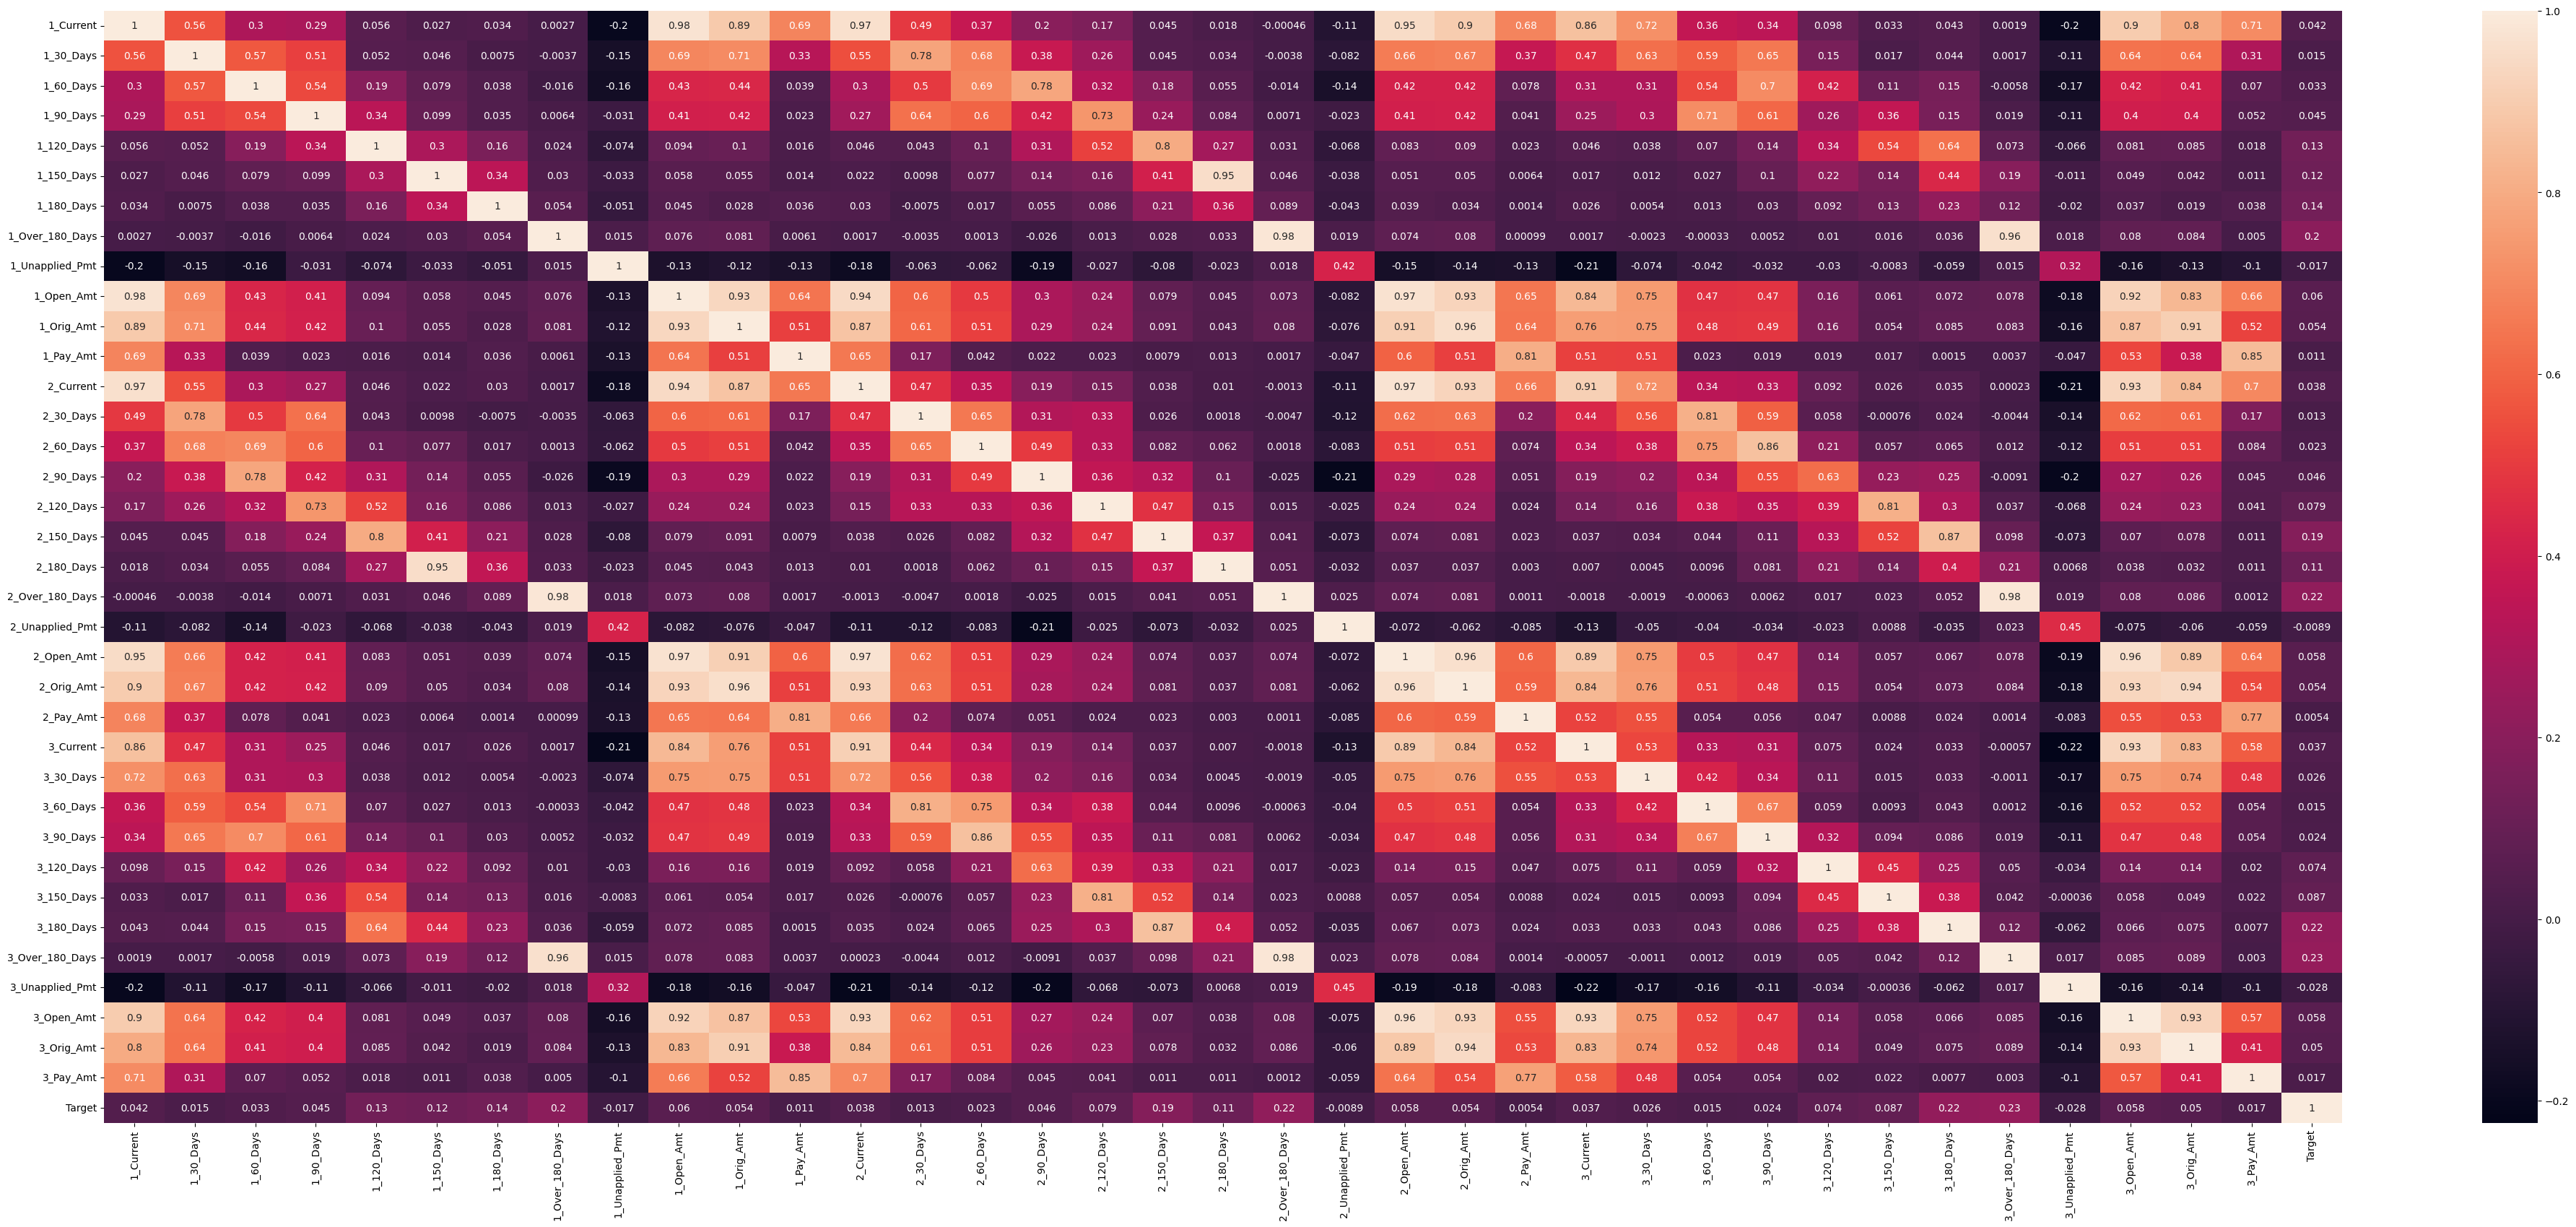

In [ ]:
plt.figure(figsize = (50,20))
ax = sns.heatmap(df_cust.corr(), annot=True)
ax

There is correlation in the model. We can remove these and optimize the model.

## Pvalue

P value helps identify the significant variables. When p value < 0.05, variable is significant

In [ ]:
X.drop(columns = "Cust_Name", inplace = True)
X

,1_Current,1_30_Days,1_60_Days,1_90_Days,1_120_Days,1_150_Days,1_180_Days,1_Over_180_Days,1_Unapplied_Pmt,1_Open_Amt,...,3_60_Days,3_90_Days,3_120_Days,3_150_Days,3_180_Days,3_Over_180_Days,3_Unapplied_Pmt,3_Open_Amt,3_Orig_Amt,3_Pay_Amt
0,43065.11,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,43065.11,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,90211.30,90211.30,14.79
1,178.58,0.0,0.00,0.0,0.0,0.0,0.0,-422.63,-548.1,-792.15,...,0.0,178.58,0.0,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,442475.85,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,442475.85,...,589.8,0.00,0.0,0.0,0.00,0.00,0.00,389841.57,389841.48,164.21
3,0.00,0.0,52.43,0.0,0.0,0.0,0.0,0.00,0.0,52.43,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,462.32,462.32,8127.27
4,494.24,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,494.24,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2442.24,2442.24,11861.03
35992,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,732.51,0.00,0.00,732.51,9782.61,9050.10
35993,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,762.81,762.81,50.90
35994,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2245.96,2245.96,3222.77


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
35991    0
35992    1
35993    0
35994    0
35995    0
Name: Target, Length: 35996, dtype: int64

In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     125.4
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        18:39:41   Log-Likelihood:                 15677.
No. Observations:               35996   AIC:                        -3.129e+04
Df Residuals:                   35962   BIC:                        -3.100e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0256      0.001     

Conclusion: After a number of iterations, it was found that alot of columns needed to be removed. AFter multiple iterations,it was decied to explore next sections.

# ITERATION 1: TESTING & CONCLUSION

Now, we will give input to out model for the month of sept, oct and nov and see what predictions that model gives for the month of december. We will check accuracy by checking predictions against the actual high risk customers for the month of december.

## Reading dec csv file in df_dec

In [ ]:
df_dec = pd.read_csv('Dec.csv')
df_dec

# Dropping any duplicates that might exist in August data
df_dec=df_dec.drop_duplicates(subset=['Cust_Name'])


# The numeric columns have ',' symbol which needs to be removed.
# Also, the datatype of these columns needs to set to 'FLOAT'

# Selecting all columns except the Cust_Name column
cols_to_convert = df_dec.columns.drop('Cust_Name')
cols_to_convert

# Remove commas from the selected columns
df_dec[cols_to_convert] = df_dec[cols_to_convert].replace(',', '', regex=True)

df_dec[cols_to_convert] = df_dec[cols_to_convert].astype(float)

# Print the resulting dataframe
df_dec

,Cust_Name,Dec_Current,Dec_30_Days,Dec_60_Days,Dec_90_Days,Dec_120_Days,Dec_150_Days,Dec_180_Days,Dec_Over_180_Days,Dec_Unapplied_Pmt,Dec_Open_Amt,Dec_Orig_Amt,Dec_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,75374.96,60.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75435.95,75435.95,89476.23
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,0.00,0.00,0.00,178.58,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,505647.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,505647.93,505644.82,25062.21
3,"A AND H ROOFING, LLC S019907",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-63.97,-63.97,-63.97,63.97
4,A AND J ROOFING CONTRACTORS AAN113,380.49,-48.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,331.81,331.81,243.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,"911-EXTERIORS, LLC {COLL} 9EX581",368.42,458.95,955.60,3908.79,31234.36,0.00,0.00,0.00,0.00,36926.12,38991.50,100000.00
27994,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-155.32,0.00,-155.32,-155.32,75.00
27995,970 SERVICES 970242,18093.65,-671.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17422.39,17422.39,29340.29
27996,@ HOME BUILDERS LLC 001145,350942.48,148615.30,46967.96,30677.18,138.07,1241.85,11756.03,4478.66,-18749.76,576067.77,344082.88,43403.95


Selecting only those customers who have data for sept, oct and nov and dec

In [ ]:
# merge the dataframes on the cust_id column
merged_df = pd.merge(df_sept, df_oct, on='Cust_Name', how='outer')
merged_df = pd.merge(merged_df, df_nov, on='Cust_Name', how='outer')
merged_df = pd.merge(merged_df, df_dec, on='Cust_Name')

# fill missing values with 0
merged_df = merged_df.fillna(0)

merged_df

,Cust_Name,Sept_Current,Sept_30_Days,Sept_60_Days,Sept_90_Days,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days,Sept_Unapplied_Pmt,...,Dec_60_Days,Dec_90_Days,Dec_120_Days,Dec_150_Days,Dec_180_Days,Dec_Over_180_Days,Dec_Unapplied_Pmt,Dec_Open_Amt,Dec_Orig_Amt,Dec_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,39385.40,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,75435.95,75435.95,89476.23
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,178.58,0.00,0.0,0.0,0.0,-422.63,-548.1,...,0.0,0.0,0.0,178.58,0.0,-422.63,-548.1,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,477032.56,589.80,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,505647.93,505644.82,25062.21
3,A AND J ROOFING CONTRACTORS AAN113,8073.84,0.00,0.00,52.43,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,331.81,331.81,243.25
4,A AND J VELASQUEZ ROOFING S007756,4807.62,494.24,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,402.76,402.76,4501.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26370,318 CONSTRUCTION LLC 318574,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,14723.22,14723.22,-1284.69
26371,4 SEASON ROOFING LLC S015289,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,-23.0,32473.46,32473.46,1670.64
26372,42 PARALLEL CONSTRUCTION LLC 42PCON,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,3020.66,3020.66,9622.18
26373,5 VIZION ENTERTAINMENT LLC S019618,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,10393.96,10393.96,0.00


In [ ]:
# Maintaining a list of customers who we are testing

custs = merged_df['Cust_Name']
custs

0          A A A ROOFING SERVICES INC AAA541
1               A A WINDOWS 'N' DOORS 100001
2                     A AND C ROOFING AAC339
3         A AND J ROOFING CONTRACTORS AAN113
4          A AND J VELASQUEZ ROOFING S007756
                        ...                 
26370            318 CONSTRUCTION LLC 318574
26371           4 SEASON ROOFING LLC S015289
26372    42 PARALLEL CONSTRUCTION LLC 42PCON
26373     5 VIZION ENTERTAINMENT LLC S019618
26374                 5R ROOFING LLC S014399
Name: Cust_Name, Length: 26375, dtype: object

In [ ]:
# Creating df_cust which will be used for testing the model

merged_df_test = pd.merge(df_sept, df_oct, on='Cust_Name', how='outer')
merged_df_test = pd.merge(merged_df_test, df_nov, on='Cust_Name', how='outer')

# fill missing values with 0
merged_df_test = merged_df_test.fillna(0)
merged_df_test

,Cust_Name,Sept_Current,Sept_30_Days,Sept_60_Days,Sept_90_Days,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days,Sept_Unapplied_Pmt,...,Nov_60_Days,Nov_90_Days,Nov_120_Days,Nov_150_Days,Nov_180_Days,Nov_Over_180_Days,Nov_Unapplied_Pmt,Nov_Open_Amt,Nov_Orig_Amt,Nov_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,39385.40,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,17095.15,17095.15,89476.23
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,178.58,0.00,0.0,0.0,0.0,-422.63,-548.1,...,0.0,178.58,0.0,0.0,0.0,-422.63,-548.1,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,477032.56,589.80,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,395042.97,395042.97,2984.39
3,A AND J ROOFING CONTRACTORS AAN113,8073.84,0.00,0.00,52.43,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,-48.68,-48.68,462.32
4,A AND J VELASQUEZ ROOFING S007756,4807.62,494.24,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35686,5 VIZION ENTERTAINMENT LLC S019618,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,2923.17,2923.17,0.00
35687,5R ROOFING LLC S014399,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,6959.86,6959.86,632.99
35688,5050 TRANSIT ROAD LLC S019567,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,24142.50,24142.50,0.00
35689,787 CONSTRUCTION LLC S008574,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,934.09,934.09,12949.02


In [ ]:
# Keeping only those customers in  df_cust who have data for all 4 months
merged_df_test = merged_df_test[merged_df_test['Cust_Name'].isin(custs)]
merged_df_test

,Cust_Name,Sept_Current,Sept_30_Days,Sept_60_Days,Sept_90_Days,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days,Sept_Unapplied_Pmt,...,Nov_60_Days,Nov_90_Days,Nov_120_Days,Nov_150_Days,Nov_180_Days,Nov_Over_180_Days,Nov_Unapplied_Pmt,Nov_Open_Amt,Nov_Orig_Amt,Nov_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,39385.40,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,17095.15,17095.15,89476.23
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,178.58,0.00,0.0,0.0,0.0,-422.63,-548.1,...,0.0,178.58,0.0,0.0,0.0,-422.63,-548.1,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,477032.56,589.80,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,395042.97,395042.97,2984.39
3,A AND J ROOFING CONTRACTORS AAN113,8073.84,0.00,0.00,52.43,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,-48.68,-48.68,462.32
4,A AND J VELASQUEZ ROOFING S007756,4807.62,494.24,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35681,318 CONSTRUCTION LLC 318574,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,586.66,586.66,73.74
35683,4 SEASON ROOFING LLC S015289,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,-23.0,-23.00,-23.00,5062.15
35684,42 PARALLEL CONSTRUCTION LLC 42PCON,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,9805.70,9805.70,1250.39
35686,5 VIZION ENTERTAINMENT LLC S019618,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,2923.17,2923.17,0.00


In [ ]:
#Creating a list of customers who are actually risky i.e., have value >0 in Dec_Over_180_Days column

actual = merged_df['Cust_Name'][merged_df['Dec_Over_180_Days']>0]
actual

21           A DAVIS CONSTRUCTION(COLL) ADC009
66                        A ROOFING LLC 100142
74                A SUNRISE ROOFING INC ASU338
95            A & J REALTY VENTURES LLC AJR276
126       AAGESEN CONSTRUCTION SE(COLL) AAGCON
                         ...                  
25493       COPPER BOOM SERVICES (COLL) CBS259
25781    JE SMITH SERVICES, INC (COLL) S005746
25877      LOWE CONSTRUCTION INC (COLL) LOW197
26190    SOLARIS ROOFING SYSTEMS (COLL) SOL102
26300    TS KAUFFMAN ROOFING & CO(COLL) TSK539
Name: Cust_Name, Length: 958, dtype: object

In [ ]:
def f(row):
    if row['Cust_Name'] in df_nov_180:
        val = 1
    else:
        val = 0
    return val
merged_df_test['Target'] = merged_df_test.apply(f, axis=1)


<ipython-input-76-8e20e22c63fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_test['Target'] = merged_df_test.apply(f, axis=1)


In [ ]:
# Creating target

merged_df_test['Target'][merged_df_test['Cust_Name'].isin(actual)] = 1
merged_df_test['Target'][merged_df_test['Cust_Name'].isin(actual)]

<ipython-input-77-a7eee438a832>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_test['Target'][merged_df_test['Cust_Name'].isin(actual)] = 1
<ipython-input-77-a7eee438a832>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_test['Target'][merged_df_test['Cust_Name'].isin(actual)] = 1


26       1
86       1
97       1
121      1
167      1
        ..
34254    1
34718    1
34881    1
35380    1
35554    1
Name: Target, Length: 958, dtype: int64

In [ ]:
# THIS IS EXACTLY WHAT OUR MODEL MUST PREDICT

Y_actual = merged_df_test['Target']
Y_actual

0        0
1        0
2        0
3        0
4        0
        ..
35681    0
35683    0
35684    0
35686    0
35687    0
Name: Target, Length: 26375, dtype: int64

FINAL DATASET TO TEST MODEL-

In [ ]:
# The model doesn't need Cust_Name while testing because it is descriptive and Target is should predict sso removing thse two columns
merged_df_test.drop(columns = ['Cust_Name','Target'], inplace = True)
merged_df_test

<ipython-input-79-2addce560afe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_test.drop(columns = ['Cust_Name','Target'], inplace = True)


,Sept_Current,Sept_30_Days,Sept_60_Days,Sept_90_Days,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days,Sept_Unapplied_Pmt,Sept_Open_Amt,...,Nov_60_Days,Nov_90_Days,Nov_120_Days,Nov_150_Days,Nov_180_Days,Nov_Over_180_Days,Nov_Unapplied_Pmt,Nov_Open_Amt,Nov_Orig_Amt,Nov_Pay_Amt
0,39385.40,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,39385.40,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,17095.15,17095.15,89476.23
1,0.00,0.00,178.58,0.00,0.0,0.0,0.0,-422.63,-548.1,-792.15,...,0.0,178.58,0.0,0.0,0.0,-422.63,-548.1,-792.15,-1593.24,6262.16
2,477032.56,589.80,0.00,0.00,0.0,0.0,0.0,0.00,0.0,477622.36,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,395042.97,395042.97,2984.39
3,8073.84,0.00,0.00,52.43,0.0,0.0,0.0,0.00,0.0,8126.27,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,-48.68,-48.68,462.32
4,4807.62,494.24,0.00,0.00,0.0,0.0,0.0,0.00,0.0,5301.86,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35681,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,586.66,586.66,73.74
35683,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,-23.0,-23.00,-23.00,5062.15
35684,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,9805.70,9805.70,1250.39
35686,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,2923.17,2923.17,0.00


In [ ]:
merged_df_test.columns

Index(['Sept_Current', 'Sept_30_Days', 'Sept_60_Days', 'Sept_90_Days',
       'Sept_120_Days', 'Sept_150_Days', 'Sept_180_Days', 'Sept_Over_180_Days',
       'Sept_Unapplied_Pmt', 'Sept_Open_Amt', 'Sept_Orig_Amt', 'Sept_Pay_Amt',
       'Current', 'Oct_30_Days', 'Oct_60_Days', 'Oct_90_Days', 'Oct_120_Days',
       'Oct_150_Days', 'Oct_180_Days', 'Oct_Over_180_Days',
       'Oct_Unapplied_Pmt', 'Oct_Open_Amt', 'Oct_Orig_Amt', 'Oct_Pay_Amt',
       'Nov_Current', 'Nov_30_Days', 'Nov_60_Days', 'Nov_90_Days',
       'Nov_120_Days', 'Nov_150_Days', 'Nov_180_Days', 'Nov_Over_180_Days',
       'Nov_Unapplied_Pmt', 'Nov_Open_Amt', 'Nov_Orig_Amt', 'Nov_Pay_Amt'],
      dtype='object')

## Testing

In [ ]:
# Renaming all columns

merged_df_test.rename(columns = {'Sept_Current':'1_Current','Sept_30_Days': '1_30_Days',
                          'Sept_60_Days':'1_60_Days', 'Sept_90_Days':'1_90_Days',
       'Sept_120_Days': '1_120_Days', 'Sept_150_Days': '1_150_Days',
       'Sept_180_Days' : '1_180_Days', 'Sept_Over_180_Days' : '1_Over_180_Days',
       'Sept_Unapplied_Pmt' : '1_Unapplied_Pmt', 'Sept_Open_Amt':  '1_Open_Amt',
       'Sept_Orig_Amt': '1_Orig_Amt', 'Sept_Pay_Amt' : '1_Pay_Amt',
       'Current': '2_Current', 'Oct_30_Days':  '2_30_Days',
        'Oct_60_Days':  '2_60_Days', 'Oct_90_Days' : '2_90_Days',
       'Oct_120_Days' : '2_120_Days', 'Oct_150_Days' : '2_150_Days',
       'Oct_180_Days' : '2_180_Days', 'Oct_Over_180_Days': '2_Over_180_Days',
       'Oct_Unapplied_Pmt' : '2_Unapplied_Pmt', 'Oct_Open_Amt' : '2_Open_Amt',
        'Oct_Orig_Amt': '2_Orig_Amt', 'Oct_Pay_Amt': '2_Pay_Amt',
       'Nov_Current': '3_Current', 'Nov_30_Days': '3_30_Days', 'Nov_60_Days': '3_60_Days',
        'Nov_90_Days': '3_90_Days', 'Nov_120_Days': '3_120_Days',
       'Nov_150_Days': '3_150_Days', 'Nov_180_Days': '3_180_Days',
       'Nov_Over_180_Days': '3_Over_180_Days',
       'Nov_Unapplied_Pmt': '3_Unapplied_Pmt', 'Nov_Open_Amt': '3_Open_Amt',
       'Nov_Orig_Amt': '3_Orig_Amt', 'Nov_Pay_Amt': '3_Pay_Amt' }, inplace = True)
merged_df_test

<ipython-input-81-6e655c541815>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_test.rename(columns = {'Sept_Current':'1_Current','Sept_30_Days': '1_30_Days',


,1_Current,1_30_Days,1_60_Days,1_90_Days,1_120_Days,1_150_Days,1_180_Days,1_Over_180_Days,1_Unapplied_Pmt,1_Open_Amt,...,3_60_Days,3_90_Days,3_120_Days,3_150_Days,3_180_Days,3_Over_180_Days,3_Unapplied_Pmt,3_Open_Amt,3_Orig_Amt,3_Pay_Amt
0,39385.40,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,39385.40,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,17095.15,17095.15,89476.23
1,0.00,0.00,178.58,0.00,0.0,0.0,0.0,-422.63,-548.1,-792.15,...,0.0,178.58,0.0,0.0,0.0,-422.63,-548.1,-792.15,-1593.24,6262.16
2,477032.56,589.80,0.00,0.00,0.0,0.0,0.0,0.00,0.0,477622.36,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,395042.97,395042.97,2984.39
3,8073.84,0.00,0.00,52.43,0.0,0.0,0.0,0.00,0.0,8126.27,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,-48.68,-48.68,462.32
4,4807.62,494.24,0.00,0.00,0.0,0.0,0.0,0.00,0.0,5301.86,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35681,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,586.66,586.66,73.74
35683,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,-23.0,-23.00,-23.00,5062.15
35684,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,9805.70,9805.70,1250.39
35686,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,2923.17,2923.17,0.00


In [ ]:
merged_df_test.columns

Index(['1_Current', '1_30_Days', '1_60_Days', '1_90_Days', '1_120_Days',
       '1_150_Days', '1_180_Days', '1_Over_180_Days', '1_Unapplied_Pmt',
       '1_Open_Amt', '1_Orig_Amt', '1_Pay_Amt', '2_Current', '2_30_Days',
       '2_60_Days', '2_90_Days', '2_120_Days', '2_150_Days', '2_180_Days',
       '2_Over_180_Days', '2_Unapplied_Pmt', '2_Open_Amt', '2_Orig_Amt',
       '2_Pay_Amt', '3_Current', '3_30_Days', '3_60_Days', '3_90_Days',
       '3_120_Days', '3_150_Days', '3_180_Days', '3_Over_180_Days',
       '3_Unapplied_Pmt', '3_Open_Amt', '3_Orig_Amt', '3_Pay_Amt'],
      dtype='object')

In [ ]:
# Testing model on lr1 model which was fit on SMOTE balanced data
predictions = lr1.predict(merged_df_test)

In [ ]:
print(classification_report(Y_actual, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     25417
           1       0.44      0.89      0.58       958

    accuracy                           0.95     26375
   macro avg       0.72      0.92      0.78     26375
weighted avg       0.98      0.95      0.96     26375



In [ ]:
# CReating confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_actual, predictions)

cm

array([[24318,  1099],
       [  108,   850]])

In [ ]:
# Use score method to get accuracy of model
score = lr.score(X_test, y_test)
print(score)

0.9612927122881748


In [ ]:
# Calculating recall
print('Recall: %.3f' % recall_score(Y_actual, predictions))

Recall: 0.887


##CONCLUSION:

After testing on December data, we can again see that lr1 model (balanced data with smote) predicts with 95% accuracy with recall of 88.7%.

This model is giving very good results however there are certain inefficiencies with this model which are addressed in the nest iteration. The inefficiencies are:
1.   Correlated data and insignificant data is being given to the model.
2.   3 months of data needs to be given to the model for prediction and the model can predict only one month in advance.

**How to use model:**

Assume that you want to make a prediction of April.

1.   Run this entire file first to train the model.
2.   Prepare a dataset by clubbing together AR data of January, February and March.The AR data columns that you require for every month for each customer are 'Current', '30_Days', '60_Days','120_Days','150_Days', '180_Days', 'Over_180_Days', 'Unapplied_Pmt', 'Open_Amt', 'Orig_Amt', 'Pay_Amt'.
3.   Remove the 'Cust_Name' column from your dataset. However, maintain a separate list of the cust_id in the same sequence as being given to the model. Rename columns such that all columns for the oldest month ( in this case - Januray) are prefixed with '1_', all columns belonging to the next month (here February) are prefixed with '2_', and the last month (here March) is prefixed with '3_'
4.   Run the model on the created dataset by using the following code snippet "predictions = lr1.predict('give your dataset name here')"
5.   Join predictions and Cust_Name to see which customers are predicted to go high risk








# ITERATION 2 - Can I find out accurately only by looking at August data if customer will go high risk in November?

After running model on all of august data, we still found insignificant variables and correlations. Removed all those columns only some and created the following model. Yes! Just by looking at columns 'Cust_Name', 'Current', '120_Days', '150_Days', '180_Days', 'Over_180_Days' of August, you can predict if a customer will go high risk in November or not with 95% accuracy!

## Creating training dataset again using only august data

In [ ]:
df_aug = pd.read_csv('Aug.csv')

# Renaming customer name column to cust_name
df_aug.rename(columns = {'Customer Name':'Cust_Name'}, inplace = True)

# Dropping any duplicates that might exist in August data
df_aug=df_aug.drop_duplicates(subset=['Cust_Name'])

# The numeric columns have ',' symbol which needs to be removed. Also, the datatype of these columns needs to set to 'FLOAT'
# Selecting all columns except the Cust_Name column
cols_to_convert = df_aug.columns.drop('Cust_Name')
cols_to_convert

# Remove commas from the selected columns
df_aug[cols_to_convert] = df_aug[cols_to_convert].replace(',', '', regex=True)

# Assigning float datatype
df_aug[cols_to_convert] = df_aug[cols_to_convert].astype(float)

# Print the resulting dataframe
df_aug

,Cust_Name,Aug_Current,Aug_30_Days,Aug_60_Days,Aug_90_Days,Aug_120_Days,Aug_150_Days,Aug_180_Days,Aug_Over_180_Days,Aug_Unapplied_Pmt,Aug_Open_Amt,Aug_Orig_Amt,Aug_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,43065.11,43065.11,47675.21
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.00,0.00,0.00,0.0,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,442475.85,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,442475.85,442475.85,61130.65
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,52.43,0.00,0.00,0.0,0.00,0.00,0.00,52.43,52.43,104.94
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,494.24,494.24,395.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29419,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,32.05,32.05,1467.48
29420,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-155.32,0.00,-155.32,-155.32,142.68
29421,970 SERVICES 970242,25211.57,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,25211.57,25211.57,22432.29
29422,@ HOME BUILDERS LLC 001145,397523.28,74439.37,9120.47,-410.87,-2100.73,0.0,-2015.46,7306.52,-6853.32,477009.26,224493.91,0.00


In [ ]:
df_aug = df_aug[['Cust_Name','Aug_Current','Aug_120_Days','Aug_150_Days','Aug_180_Days','Aug_Over_180_Days']]

In [ ]:
df_cust_WithNov= pd.merge(df_aug, df_nov, on = 'Cust_Name')
df_cust_WithNov

,Cust_Name,Aug_Current,Aug_120_Days,Aug_150_Days,Aug_180_Days,Aug_Over_180_Days,Nov_Current,Nov_30_Days,Nov_60_Days,Nov_90_Days,Nov_120_Days,Nov_150_Days,Nov_180_Days,Nov_Over_180_Days,Nov_Unapplied_Pmt,Nov_Open_Amt,Nov_Orig_Amt,Nov_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00,17095.15,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,17095.15,17095.15,89476.23
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63,0.00,0.00,0.00,178.58,0.00,0.00,0.0,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00,376338.69,18704.28,0.00,0.00,0.00,0.00,0.0,0.00,0.00,395042.97,395042.97,2984.39
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00,-48.68,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-48.68,-48.68,462.32
4,A AND R TOTAL EXTERIORS LLC S003692,27145.40,0.00,0.0,0.00,0.00,97.25,8688.91,0.00,0.00,0.00,0.00,0.0,0.00,0.00,8786.16,8786.16,27145.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23581,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.00,2140.42
23582,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-155.32,0.00,-155.32,-155.32,370.27
23583,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00,16759.41,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,16759.41,16759.41,29340.29
23584,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52,483258.13,97381.23,50105.45,230.05,1241.85,11756.03,96.2,4382.46,-9527.04,638924.36,453743.60,224.25


In [ ]:
# Taking out customers in November who were high risk, i.e, had some value in 180+ due

df_nov_180=df_cust_WithNov['Cust_Name'][df_cust_WithNov['Nov_Over_180_Days']>0]
df_nov_180

21          A DAVIS CONSTRUCTION(COLL) ADC009
64                       A ROOFING LLC 100142
72               A SUNRISE ROOFING INC ASU338
93           A & J REALTY VENTURES LLC AJR276
127      AAGESEN CONSTRUCTION SE(COLL) AAGCON
                         ...                 
23561            7 SKY ROOFING (COLL) S010977
23565                 75 SOUTH OB LLC 3825678
23571                      84 LUMBER 84LUMBER
23572              84 LUMBER COMPANY** 84LU10
23584              @ HOME BUILDERS LLC 001145
Name: Cust_Name, Length: 957, dtype: object

In [ ]:
def f(row):
    if row['Cust_Name'] in df_nov_180:
        val = 1
    else:
        val = 0
    return val
df_aug['Target'] = df_aug.apply(f, axis=1)

<ipython-input-105-56f05727667f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['Target'] = df_aug.apply(f, axis=1)


In [ ]:
# Setting Target variable = 1

df_aug['Target'][df_aug['Cust_Name'].isin(df_nov_180)] = 1
df_aug['Target'][df_aug['Cust_Name'].isin(df_nov_180)]

<ipython-input-106-44642d05244e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['Target'][df_aug['Cust_Name'].isin(df_nov_180)] = 1
<ipython-input-106-44642d05244e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['Target'][df_aug['Cust_Name'].isin(df_nov_180)] = 1


23       1
84       1
93       1
117      1
161      1
        ..
29398    1
29403    1
29409    1
29410    1
29422    1
Name: Target, Length: 957, dtype: int64

In [ ]:
df_aug

,Cust_Name,Aug_Current,Aug_120_Days,Aug_150_Days,Aug_180_Days,Aug_Over_180_Days,Target
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00,0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63,0
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00,0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00,0
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...
29419,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00,0
29420,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32,0
29421,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00,0
29422,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52,1


In [ ]:
df_aug.columns

Index(['Cust_Name', 'Aug_Current', 'Aug_120_Days', 'Aug_150_Days',
       'Aug_180_Days', 'Aug_Over_180_Days', 'Target'],
      dtype='object')

In [ ]:
df_aug.rename(columns = {'Aug_Current':"Current", 'Aug_30_Days':"30_Days", 'Aug_60_Days':"60_Days",
                         'Aug_90_Days':"90_Days", 'Aug_120_Days':"120_Days", 'Aug_150_Days':"150_Days",
                         'Aug_180_Days':"180_Days", 'Aug_Over_180_Days':"Over_180_Days",
                          'Aug_Unapplied_Pmt':"Unapplied_Pmt", 'Aug_Open_Amt':"Open_Amt",
                         'Aug_Orig_Amt':"Orig_Amt", 'Aug_Pay_Amt':"Pay_Amt"}, inplace = True)
df_aug

<ipython-input-109-e1e046742e1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug.rename(columns = {'Aug_Current':"Current", 'Aug_30_Days':"30_Days", 'Aug_60_Days':"60_Days",


,Cust_Name,Current,120_Days,150_Days,180_Days,Over_180_Days,Target
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00,0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63,0
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00,0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00,0
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...
29419,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00,0
29420,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32,0
29421,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00,0
29422,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52,1


In [ ]:
# Setting X data. X data contains all the input data that we give to a model

X = df_aug.copy()
X

,Cust_Name,Current,120_Days,150_Days,180_Days,Over_180_Days,Target
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00,0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63,0
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00,0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00,0
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...
29419,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00,0
29420,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32,0
29421,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00,0
29422,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52,1


In [ ]:
# We don't need Target Column in X because Target is what our model should be able to predict. It is the output that the model should give

X.drop(['Target'], axis = 1, inplace = True)
X

,Cust_Name,Current,120_Days,150_Days,180_Days,Over_180_Days
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...
29419,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00
29420,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32
29421,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00
29422,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52


In [ ]:
# Creating Y data. It contains the output (Target in this case) that the model should be able to predict

Y = df_aug['Target']
Y

0        0
1        0
2        0
3        0
4        0
        ..
29419    0
29420    0
29421    0
29422    1
29423    0
Name: Target, Length: 29424, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20596, 6)
Number transactions y_train dataset:  (20596,)
Number transactions X_test dataset:  (8828, 6)
Number transactions y_test dataset:  (8828,)


In [ ]:
# Taking out of list of all customers who we are using for training out model. May need this info for future reference

X_custs = X_train['Cust_Name']
X_custs

28279         WATERPROOFING EXPERTS INC WAT338
8653           ELITE RECONSTRUCTION LLC ELE226
21939          RESTORATION BUILDERS INC RNB226
17631                 MIKE LEE BUILDERS MLB374
5317                      CHRIS GRIFFIN chr010
                         ...                  
13123               JAMES HOFER ROOFING JAM633
19648               PALMETTO PROPERTIES PPR134
9845           FRANK GENERAL CONTRACTOR FGC303
10799    GREAT LAKE EXTERIOR CONST SVCS GPGRLE
2732                          BARRETT INC 7002
Name: Cust_Name, Length: 20596, dtype: object

In [ ]:
# Cust_Name is just a descriptive column and we don't need it to train our model. Hence, removing it from X_train
X_train.drop('Cust_Name', axis = 1, inplace = True)
X_train

,Current,120_Days,150_Days,180_Days,Over_180_Days
28279,6243.28,0.0,0.0,0.0,0.00
8653,0.00,0.0,0.0,0.0,-281.66
21939,29678.15,0.0,0.0,0.0,0.00
17631,1151.67,0.0,0.0,0.0,0.00
5317,0.00,0.0,0.0,0.0,0.00
...,...,...,...,...,...
13123,105183.54,0.0,0.0,0.0,0.00
19648,24894.75,0.0,0.0,0.0,0.00
9845,0.00,0.0,0.0,0.0,-148.80
10799,0.00,0.0,0.0,0.0,0.00


In [ ]:
# Taking out of list of all customers who we are using for testing out model. May need this info for future reference

X_test_custs = X_test['Cust_Name']
X_test_custs

16017         LOCAL PROPERTY MANAGEMENT LOC225
865                ALBERTI WOOD WORKING 601208
1687            ANDREWS ROOFING COMPANY AND155
5108             CHAMBERLIN ROOFING LLC CHAMCO
1560     AMERICAN STANDARDS RFG AND SID ASR236
                         ...                  
15340              LABANDA GUTTERS, LLC LAG511
1727                      ANNOINTED INC ROK230
3012             BENCHMARK ROOFING LLC S017584
12812          ISAAC HEATING & A/C INC. 019750
16861               MASHURA BURGER, LLP M00020
Name: Cust_Name, Length: 8828, dtype: object

In [ ]:
y_test

16017    0
865      0
1687     0
5108     1
1560     0
        ..
15340    0
1727     0
3012     0
12812    0
16861    0
Name: Target, Length: 8828, dtype: int64

In [ ]:
# Cust_Name is just a descriptive column and we don't need it to test our model. Hence, removing it from X_train

X_test.drop('Cust_Name', axis = 1, inplace = True)
X_test

,Current,120_Days,150_Days,180_Days,Over_180_Days
16017,24116.93,0.0,0.0,0.0,0.00
865,0.00,0.0,0.0,0.0,-153.89
1687,1324.61,0.0,0.0,0.0,0.00
5108,60.20,60.2,60.2,60.2,4145.43
1560,10425.92,0.0,0.0,0.0,0.00
...,...,...,...,...,...
15340,0.00,0.0,0.0,0.0,-1494.61
1727,70.75,0.0,0.0,0.0,0.00
3012,6907.94,0.0,0.0,0.0,0.00
12812,6678.83,0.0,0.0,0.0,0.00


## Training model on balanced data and displaying metrics

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 686
Before OverSampling, counts of label '0': 19910 

After OverSampling, the shape of train_X: (39820, 5)
After OverSampling, the shape of train_y: (39820,) 

After OverSampling, counts of label '1': 19910
After OverSampling, counts of label '0': 19910


In [ ]:
# Training Logistic Regression model

lr2 = LogisticRegression()
lr2.fit(X_train_res, y_train_res.ravel())
predictions = lr2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      8557
           1       0.39      0.94      0.55       271

    accuracy                           0.95      8828
   macro avg       0.69      0.95      0.76      8828
weighted avg       0.98      0.95      0.96      8828



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

cm

array([[8155,  402],
       [  17,  254]])

In [ ]:
# Use score method to get accuracy of model
score = lr2.score(X_test, y_test)
print(score)

0.9525373810602628


In [ ]:
X.drop(columns = "Cust_Name", inplace = True)

In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     489.7
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        18:50:51   Log-Likelihood:                 10312.
No. Observations:               29424   AIC:                        -2.061e+04
Df Residuals:                   29418   BIC:                        -2.056e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0288      0.001     28.587

<Axes: >

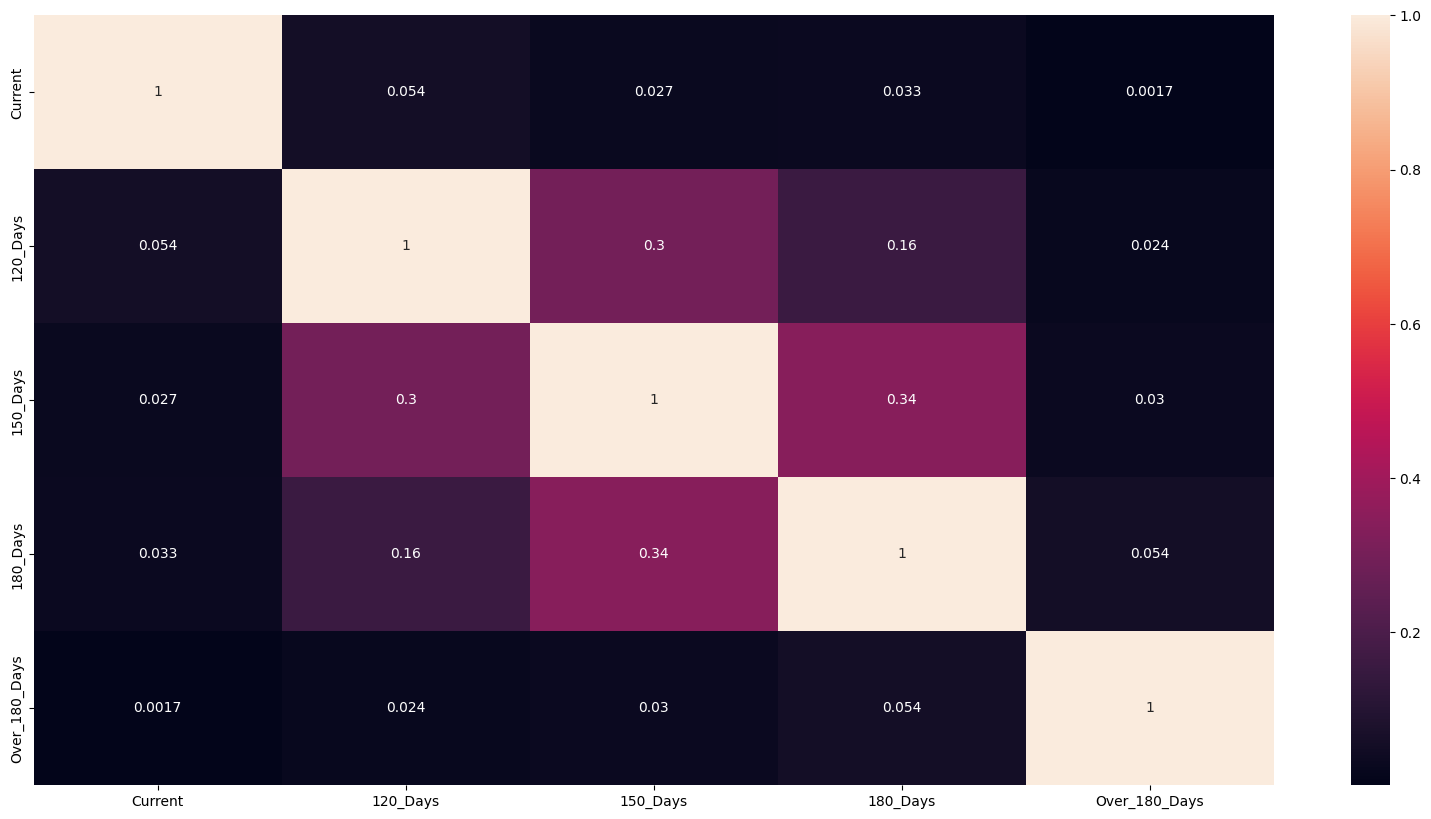

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.heatmap(X.corr(), annot=True)
ax

## Testing model
Testing on September data to predict if a customer will go high risk in December or not

In [ ]:
df_Sept_Dec= pd.merge(df_sept, df_dec, on = 'Cust_Name')
df_Sept_Dec

,Cust_Name,Sept_Current,Sept_30_Days,Sept_60_Days,Sept_90_Days,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days,Sept_Unapplied_Pmt,...,Dec_60_Days,Dec_90_Days,Dec_120_Days,Dec_150_Days,Dec_180_Days,Dec_Over_180_Days,Dec_Unapplied_Pmt,Dec_Open_Amt,Dec_Orig_Amt,Dec_Pay_Amt
0,A A A ROOFING SERVICES INC AAA541,39385.40,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75435.95,75435.95,89476.23
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,178.58,0.00,0.00,0.00,0.0,-422.63,-548.10,...,0.00,0.00,0.00,178.58,0.00,-422.63,-548.10,-792.15,-1593.24,6262.16
2,A AND C ROOFING AAC339,477032.56,589.80,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,505647.93,505644.82,25062.21
3,A AND J ROOFING CONTRACTORS AAN113,8073.84,0.00,0.00,52.43,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,331.81,331.81,243.25
4,A AND J VELASQUEZ ROOFING S007756,4807.62,494.24,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,402.76,402.76,4501.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23265,911 RESTORATION NOO226,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-184.14,0.00,...,0.00,0.00,0.00,0.00,0.00,-184.14,0.00,-184.14,-184.14,182.33
23266,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-155.32,0.00,...,0.00,0.00,0.00,0.00,0.00,-155.32,0.00,-155.32,-155.32,75.00
23267,970 SERVICES 970242,46428.96,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17422.39,17422.39,29340.29
23268,@ HOME BUILDERS LLC 001145,599663.97,177443.41,25157.40,9568.67,-410.87,-2100.73,0.0,9096.28,-12318.60,...,46967.96,30677.18,138.07,1241.85,11756.03,4478.66,-18749.76,576067.77,344082.88,43403.95


In [ ]:
# Taking out customers in November who were high risk, i.e, had some value in 180+ due

df_dec_180=df_Sept_Dec['Cust_Name'][df_Sept_Dec['Dec_Over_180_Days']>0]
df_dec_180

21          A DAVIS CONSTRUCTION(COLL) ADC009
66                       A ROOFING LLC 100142
74               A SUNRISE ROOFING INC ASU338
95           A & J REALTY VENTURES LLC AJR276
126      AAGESEN CONSTRUCTION SE(COLL) AAGCON
                         ...                 
23241      5280 ROOF DESIGNS LLC(COLL) FTE740
23250            7 SKY ROOFING (COLL) S010977
23258                      84 LUMBER 84LUMBER
23259              84 LUMBER COMPANY** 84LU10
23268              @ HOME BUILDERS LLC 001145
Name: Cust_Name, Length: 912, dtype: object

In [ ]:
df_test= df_Sept_Dec[["Cust_Name","Sept_Current","Sept_120_Days","Sept_150_Days","Sept_180_Days","Sept_Over_180_Days"]]
df_test

,Cust_Name,Sept_Current,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days
0,A A A ROOFING SERVICES INC AAA541,39385.40,0.00,0.00,0.0,0.00
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,0.00,0.0,-422.63
2,A AND C ROOFING AAC339,477032.56,0.00,0.00,0.0,0.00
3,A AND J ROOFING CONTRACTORS AAN113,8073.84,0.00,0.00,0.0,0.00
4,A AND J VELASQUEZ ROOFING S007756,4807.62,0.00,0.00,0.0,0.00
...,...,...,...,...,...,...
23265,911 RESTORATION NOO226,0.00,0.00,0.00,0.0,-184.14
23266,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.0,-155.32
23267,970 SERVICES 970242,46428.96,0.00,0.00,0.0,0.00
23268,@ HOME BUILDERS LLC 001145,599663.97,-410.87,-2100.73,0.0,9096.28


In [ ]:
def f(row):
    if row['Cust_Name'] in df_nov_180:
        val = 1
    else:
        val = 0
    return val
df_test['Target'] = df_test.apply(f, axis=1)

<ipython-input-131-a796ea02a73b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Target'] = df_test.apply(f, axis=1)


In [ ]:
# Setting Target variable = 1

df_test['Target'][df_test['Cust_Name'].isin(df_dec_180)] = 1
df_test['Target'][df_test['Cust_Name'].isin(df_dec_180)]

<ipython-input-132-64ef5ea547d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Target'][df_test['Cust_Name'].isin(df_dec_180)] = 1
<ipython-input-132-64ef5ea547d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Target'][df_test['Cust_Name'].isin(df_dec_180)] = 1


21       1
66       1
74       1
95       1
126      1
        ..
23241    1
23250    1
23258    1
23259    1
23268    1
Name: Target, Length: 912, dtype: int64

In [ ]:
X = df_test.copy()
X

,Cust_Name,Sept_Current,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days,Target
0,A A A ROOFING SERVICES INC AAA541,39385.40,0.00,0.00,0.0,0.00,0
1,A A WINDOWS 'N' DOORS 100001,0.00,0.00,0.00,0.0,-422.63,0
2,A AND C ROOFING AAC339,477032.56,0.00,0.00,0.0,0.00,0
3,A AND J ROOFING CONTRACTORS AAN113,8073.84,0.00,0.00,0.0,0.00,0
4,A AND J VELASQUEZ ROOFING S007756,4807.62,0.00,0.00,0.0,0.00,0
...,...,...,...,...,...,...,...
23265,911 RESTORATION NOO226,0.00,0.00,0.00,0.0,-184.14,0
23266,965 CONSTRUCTION NIN302,0.00,0.00,0.00,0.0,-155.32,0
23267,970 SERVICES 970242,46428.96,0.00,0.00,0.0,0.00,0
23268,@ HOME BUILDERS LLC 001145,599663.97,-410.87,-2100.73,0.0,9096.28,1


In [ ]:
custs = X["Cust_Name"]
custs

0            A A A ROOFING SERVICES INC AAA541
1                 A A WINDOWS 'N' DOORS 100001
2                       A AND C ROOFING AAC339
3           A AND J ROOFING CONTRACTORS AAN113
4            A AND J VELASQUEZ ROOFING S007756
                         ...                  
23265                   911 RESTORATION NOO226
23266                  965 CONSTRUCTION NIN302
23267                      970 SERVICES 970242
23268               @ HOME BUILDERS LLC 001145
23269    @HOME CABINETRY & INTERIORS IN HOM621
Name: Cust_Name, Length: 23270, dtype: object

In [ ]:
Y = df_test['Target']
Y

0        0
1        0
2        0
3        0
4        0
        ..
23265    0
23266    0
23267    0
23268    1
23269    0
Name: Target, Length: 23270, dtype: int64

In [ ]:
X.drop(columns = ["Cust_Name","Target"], inplace = True)
X

,Sept_Current,Sept_120_Days,Sept_150_Days,Sept_180_Days,Sept_Over_180_Days
0,39385.40,0.00,0.00,0.0,0.00
1,0.00,0.00,0.00,0.0,-422.63
2,477032.56,0.00,0.00,0.0,0.00
3,8073.84,0.00,0.00,0.0,0.00
4,4807.62,0.00,0.00,0.0,0.00
...,...,...,...,...,...
23265,0.00,0.00,0.00,0.0,-184.14
23266,0.00,0.00,0.00,0.0,-155.32
23267,46428.96,0.00,0.00,0.0,0.00
23268,599663.97,-410.87,-2100.73,0.0,9096.28


In [ ]:
X.rename(columns = {'Sept_Current':"Current", 'Sept_120_Days':"120_Days", 'Sept_150_Days':"150_Days",
                         'Sept_180_Days':"180_Days", 'Sept_Over_180_Days':"Over_180_Days",
                          }, inplace = True)
X

,Current,120_Days,150_Days,180_Days,Over_180_Days
0,39385.40,0.00,0.00,0.0,0.00
1,0.00,0.00,0.00,0.0,-422.63
2,477032.56,0.00,0.00,0.0,0.00
3,8073.84,0.00,0.00,0.0,0.00
4,4807.62,0.00,0.00,0.0,0.00
...,...,...,...,...,...
23265,0.00,0.00,0.00,0.0,-184.14
23266,0.00,0.00,0.00,0.0,-155.32
23267,46428.96,0.00,0.00,0.0,0.00
23268,599663.97,-410.87,-2100.73,0.0,9096.28


In [ ]:
predictions = lr2.predict(X)

# print classification report
print(classification_report(Y, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     22358
           1       0.52      0.95      0.67       912

    accuracy                           0.96     23270
   macro avg       0.76      0.96      0.83     23270
weighted avg       0.98      0.96      0.97     23270



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y, predictions)

cm

array([[21562,   796],
       [   47,   865]])

In [ ]:
# Calculating recall
print('Recall: %.3f' % recall_score(Y, predictions))

Recall: 0.948


In [ ]:
# Accuracy
# Use score method to get accuracy of model
score = lr2.score(X_test, y_test)
print(score)


0.9525373810602628


In [ ]:
# Final output- This code creates a csv. Save it to see predictions made by the model.

output = pd.DataFrame({'Cust_Name' : custs,
                       'prediction' : predictions })
output.to_csv("Predictions.csv")
output


,Cust_Name,prediction
0,A A A ROOFING SERVICES INC AAA541,0
1,A A WINDOWS 'N' DOORS 100001,0
2,A AND C ROOFING AAC339,0
3,A AND J ROOFING CONTRACTORS AAN113,0
4,A AND J VELASQUEZ ROOFING S007756,0
...,...,...
23265,911 RESTORATION NOO226,0
23266,965 CONSTRUCTION NIN302,0
23267,970 SERVICES 970242,0
23268,@ HOME BUILDERS LLC 001145,1


CONCLUSION:

With 95% - 96% accuracy, it can be predicted 3 months in advance if a customer will become high risk or not using only 5 columns- 'Current, 120_Days, 150_Days,	180_Days,	Over_180_Days'

For eg: Using august data, you can predict if a customer will be high risk in November
Using September data, you can predict if a customer will be high risk in December

**How to use model:**

Assume that you want to make a prediction of April.

1. Run this entire file first to train the model.
2. Prepare dataset by extracting  5 columns- 'Current, 120_Days, 150_Days,	180_Days,	Over_180_Days' from the month of January.
3. Remove the 'Cust_Name' column from your dataset. However, maintain a separate list of the cust_id in the same sequence as being given to the model. Ensure the column names are 'Current, 120_Days, 150_Days,	180_Days,	Over_180_Days'
4. Run the model on the created dataset by using the following code snippet "predictions = lr2.predict('give your dataset name here')"
5. Join predictions and Cust_Name to see which customers are predicted to go high risk. Use the following code snipet:
"
Final output- This code creates a csv. Save it to see predictions made by the model.

output = pd.DataFrame({'Cust_Name' : custs,
                       'prediction' : predictions })
output.to_csv("Predictions.csv")
output
"

# ITERATION 3 - Adding significant variables

In [ ]:
df_sig = pd.read_csv("TPSAugSepOct_SigVars_Final.csv")
df_sig

,Customer Name,ACCT #,Prev_Month2_Current,Prev_Month2_30_Days,Prev_Month2_60_Days,Prev_Month2_90_Days,Prev_Month2_120_Days,Prev_Month2_150_Days,Prev_Month2_180_Days,Prev_Month2_180_Days_1,...,Current_90_Days,Current_120_Days,Current_150_Days,Current_180_Days,Current_Over_180_Days,Target,SRS Years,Exp/NACM High Credit,LEGAL_INDICATOR,BK_INDICATOR
0,MIKE COLLINS 10,10,470.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,10.0,29139.0,0.0,0.0
1,MATEO ROBLES 27,27,67.13,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,10.0,4723.0,0.0,0.0
2,GREG KOOSED 32,32,1382.00,327.34,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,9.0,8086.0,0.0,0.0
3,MARK WESTFALL 34,34,1950.79,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,9.0,13609.0,0.0,0.0
4,MICKEY GARCIA 37,37,0.00,0.00,0.0,0.0,0.0,0.0,0.0,-36.5,...,0.0,0.0,0.0,0.0,-36.5,0,9.0,346.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23361,TUCKER Oâ€™NEAL S016517,S016517,8586.86,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN
23362,UNITED SERVICES OF AMERICA INC UNT244,UNT244,-623.51,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN
23363,WILLIAMS AMERICAN WLL280,WLL280,2035.89,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN
23364,2015 PLATINUM CONST & PROPERTY PLA501,PLA501,758.09,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN


In [ ]:
df_sig.rename(columns = {"Customer Name":"Cust_Name"}, inplace = True)
df_sig = df_sig[["Cust_Name","SRS Years","Exp/NACM High Credit","LEGAL_INDICATOR","BK_INDICATOR"]]
df_sig

,Cust_Name,SRS Years,Exp/NACM High Credit,LEGAL_INDICATOR,BK_INDICATOR
0,MIKE COLLINS 10,10.0,29139.0,0.0,0.0
1,MATEO ROBLES 27,10.0,4723.0,0.0,0.0
2,GREG KOOSED 32,9.0,8086.0,0.0,0.0
3,MARK WESTFALL 34,9.0,13609.0,0.0,0.0
4,MICKEY GARCIA 37,9.0,346.0,0.0,0.0
...,...,...,...,...,...
23361,TUCKER Oâ€™NEAL S016517,NaN,NaN,NaN,NaN
23362,UNITED SERVICES OF AMERICA INC UNT244,NaN,NaN,NaN,NaN
23363,WILLIAMS AMERICAN WLL280,NaN,NaN,NaN,NaN
23364,2015 PLATINUM CONST & PROPERTY PLA501,NaN,NaN,NaN,NaN


In [ ]:
df_aug

,Cust_Name,Current,120_Days,150_Days,180_Days,Over_180_Days,Target
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00,0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63,0
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00,0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00,0
4,A AND J VELASQUEZ ROOFING S007756,494.24,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...
29419,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00,0
29420,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32,0
29421,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00,0
29422,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52,1


In [ ]:
merged_df = pd.merge(df_aug, df_sig, on='Cust_Name')
merged_df.fillna(0, inplace = True)

In [ ]:
merged_df.isna().sum()

Cust_Name               0
Current                 0
120_Days                0
150_Days                0
180_Days                0
Over_180_Days           0
Target                  0
SRS Years               0
Exp/NACM High Credit    0
LEGAL_INDICATOR         0
BK_INDICATOR            0
dtype: int64

In [ ]:
# Setting X data. X data contains all the input data that we give to a model

X = merged_df.copy()
X

,Cust_Name,Current,120_Days,150_Days,180_Days,Over_180_Days,Target,SRS Years,Exp/NACM High Credit,LEGAL_INDICATOR,BK_INDICATOR
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00,0,4.0,183470.0,0.0,0.0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63,0,19.0,8508.0,0.0,0.0
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00,0,5.0,572212.0,0.0,0.0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00,0,0.0,0.0,0.0,0.0
4,A AND R TOTAL EXTERIORS LLC S003692,27145.40,0.00,0.0,0.00,0.00,0,2.0,3243.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
23346,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00,0,5.0,2048.0,0.0,0.0
23347,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32,0,2.0,0.0,0.0,0.0
23348,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00,0,9.0,243500.0,0.0,0.0
23349,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52,1,17.0,0.0,0.0,0.0


In [ ]:
# We don't need Target Column in X because Target is what our model should be able to predict. It is the output that the model should give

X.drop(['Target'], axis = 1, inplace = True)
X

,Cust_Name,Current,120_Days,150_Days,180_Days,Over_180_Days,SRS Years,Exp/NACM High Credit,LEGAL_INDICATOR,BK_INDICATOR
0,A A A ROOFING SERVICES INC AAA541,43065.11,0.00,0.0,0.00,0.00,4.0,183470.0,0.0,0.0
1,A A WINDOWS 'N' DOORS 100001,178.58,0.00,0.0,0.00,-422.63,19.0,8508.0,0.0,0.0
2,A AND C ROOFING AAC339,442475.85,0.00,0.0,0.00,0.00,5.0,572212.0,0.0,0.0
3,A AND J ROOFING CONTRACTORS AAN113,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,A AND R TOTAL EXTERIORS LLC S003692,27145.40,0.00,0.0,0.00,0.00,2.0,3243.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23346,917 CHITTOCK STREET LLC 917CHI,32.05,0.00,0.0,0.00,0.00,5.0,2048.0,0.0,0.0
23347,965 CONSTRUCTION NIN302,0.00,0.00,0.0,0.00,-155.32,2.0,0.0,0.0,0.0
23348,970 SERVICES 970242,25211.57,0.00,0.0,0.00,0.00,9.0,243500.0,0.0,0.0
23349,@ HOME BUILDERS LLC 001145,397523.28,-2100.73,0.0,-2015.46,7306.52,17.0,0.0,0.0,0.0


In [ ]:
# Creating Y data. It contains the output (Target in this case) that the model should be able to predict

Y = merged_df['Target']
Y

0        0
1        0
2        0
3        0
4        0
        ..
23346    0
23347    0
23348    0
23349    1
23350    0
Name: Target, Length: 23351, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (16345, 10)
Number transactions y_train dataset:  (16345,)
Number transactions X_test dataset:  (7006, 10)
Number transactions y_test dataset:  (7006,)


In [ ]:
# Taking out of list of all customers who we are using for training out model. May need this info for future reference

X_custs = X_train['Cust_Name']
X_custs

1245               AMERICAN SERVICES INC AMR220
16031               PHOENIX BUILT CORP. S014410
4615       COLORADO ROOFING PROFES(COLL) CRP214
14208           MODERN IMAGE CONTRACTING MDN340
15490           OVERMYER CONSTRUCTION CO OVE040
                          ...                  
13123       MALLO HOME IMPROVEMENTS INC. 024523
19648          SOUTHEASTERN CONCRETE INC SOU186
9845     HUNTER-SKYLER ROOFING LLC FINISHEDWORK
10799             JG REMODELING SERVICE S008756
2732      BLUE DOG ROOFING & CONSTRUCTIO BLD103
Name: Cust_Name, Length: 16345, dtype: object

In [ ]:
# Cust_Name is just a descriptive column and we don't need it to train our model. Hence, removing it from X_train
X_train.drop('Cust_Name', axis = 1, inplace = True)
X_train


,Current,120_Days,150_Days,180_Days,Over_180_Days,SRS Years,Exp/NACM High Credit,LEGAL_INDICATOR,BK_INDICATOR
1245,248816.49,0.00,0.0,0.0,0.00,4.0,578279.0,0.0,0.0
16031,627.75,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4615,0.00,0.00,0.0,0.0,7903.48,4.0,55818.0,1.0,0.0
14208,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0
15490,0.00,0.00,0.0,0.0,0.00,17.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13123,-463.22,0.00,0.0,0.0,0.00,27.0,0.0,0.0,0.0
19648,0.00,0.00,0.0,0.0,-237.79,4.0,238.0,0.0,0.0
9845,1039.62,0.00,0.0,0.0,0.00,6.0,21542.0,0.0,0.0
10799,0.00,-82.27,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [ ]:
# Taking out of list of all customers who we are using for testing out model. May need this info for future reference

X_test_custs = X_test['Cust_Name']
X_test_custs

7977       F. GENCARELLI CONSTRUCTION 601769
13018               MAC CONSTRUCTION MACC500
7451               FEDAKO ROOFING LLC FDK208
31                        A G L ROOF CO 3865
15054    NORTH VIEW WINDOW & DOOR LLC NORVW0
                        ...                 
3783      CARR CONSTRUCTION SERVICES S003599
11208                   JOSE GONZALEZ JSE333
20208     STROBER-WRIGHT ROOFING INC. SWR146
3444                  B&B ROOFING LLC 500094
7906               FRITTS ENTERPRISES FRI288
Name: Cust_Name, Length: 7006, dtype: object

In [ ]:
y_test[y_test == 1]

22594    1
2808     1
888      1
8556     1
5753     1
        ..
209      1
6203     1
19809    1
13006    1
1071     1
Name: Target, Length: 288, dtype: int64

In [ ]:
# Cust_Name is just a descriptive column and we don't need it to test our model. Hence, removing it from X_train

X_test.drop('Cust_Name', axis = 1, inplace = True)
X_test

,Current,120_Days,150_Days,180_Days,Over_180_Days,SRS Years,Exp/NACM High Credit,LEGAL_INDICATOR,BK_INDICATOR
7977,0.00,0.0,0.0,0.0,-137.88,10.0,0.0,0.0,0.0
13018,0.00,0.0,0.0,0.0,0.00,20.0,0.0,0.0,0.0
7451,25992.31,0.0,0.0,0.0,0.00,6.0,8007.0,0.0,0.0
31,5496.58,0.0,0.0,0.0,0.00,6.0,109484.0,0.0,0.0
15054,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3783,5424.82,0.0,0.0,0.0,0.00,2.0,732.0,0.0,0.0
11208,0.00,0.0,0.0,-244.0,0.00,2.0,28901.0,0.0,0.0
20208,1455.70,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3444,9057.17,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 669
Before OverSampling, counts of label '0': 15676 

After OverSampling, the shape of train_X: (31352, 9)
After OverSampling, the shape of train_y: (31352,) 

After OverSampling, counts of label '1': 15676
After OverSampling, counts of label '0': 15676


In [ ]:
# Training Logistic Regression model

lr3 = LogisticRegression()
lr3.fit(X_train_res, y_train_res.ravel())
predictions = lr3.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6718
           1       0.39      0.93      0.55       288

    accuracy                           0.94      7006
   macro avg       0.69      0.93      0.76      7006
weighted avg       0.97      0.94      0.95      7006



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

cm

array([[6304,  414],
       [  20,  268]])

In [ ]:
# Use score method to get accuracy of model
score = lr3.score(X_test, y_test)
print(score)

0.9380530973451328


In [ ]:
X.drop(columns = "Cust_Name",inplace = True)

In [ ]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     946.3
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        18:59:47   Log-Likelihood:                 8285.3
No. Observations:               23351   AIC:                        -1.655e+04
Df Residuals:                   23341   BIC:                        -1.647e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0290 

<Axes: >

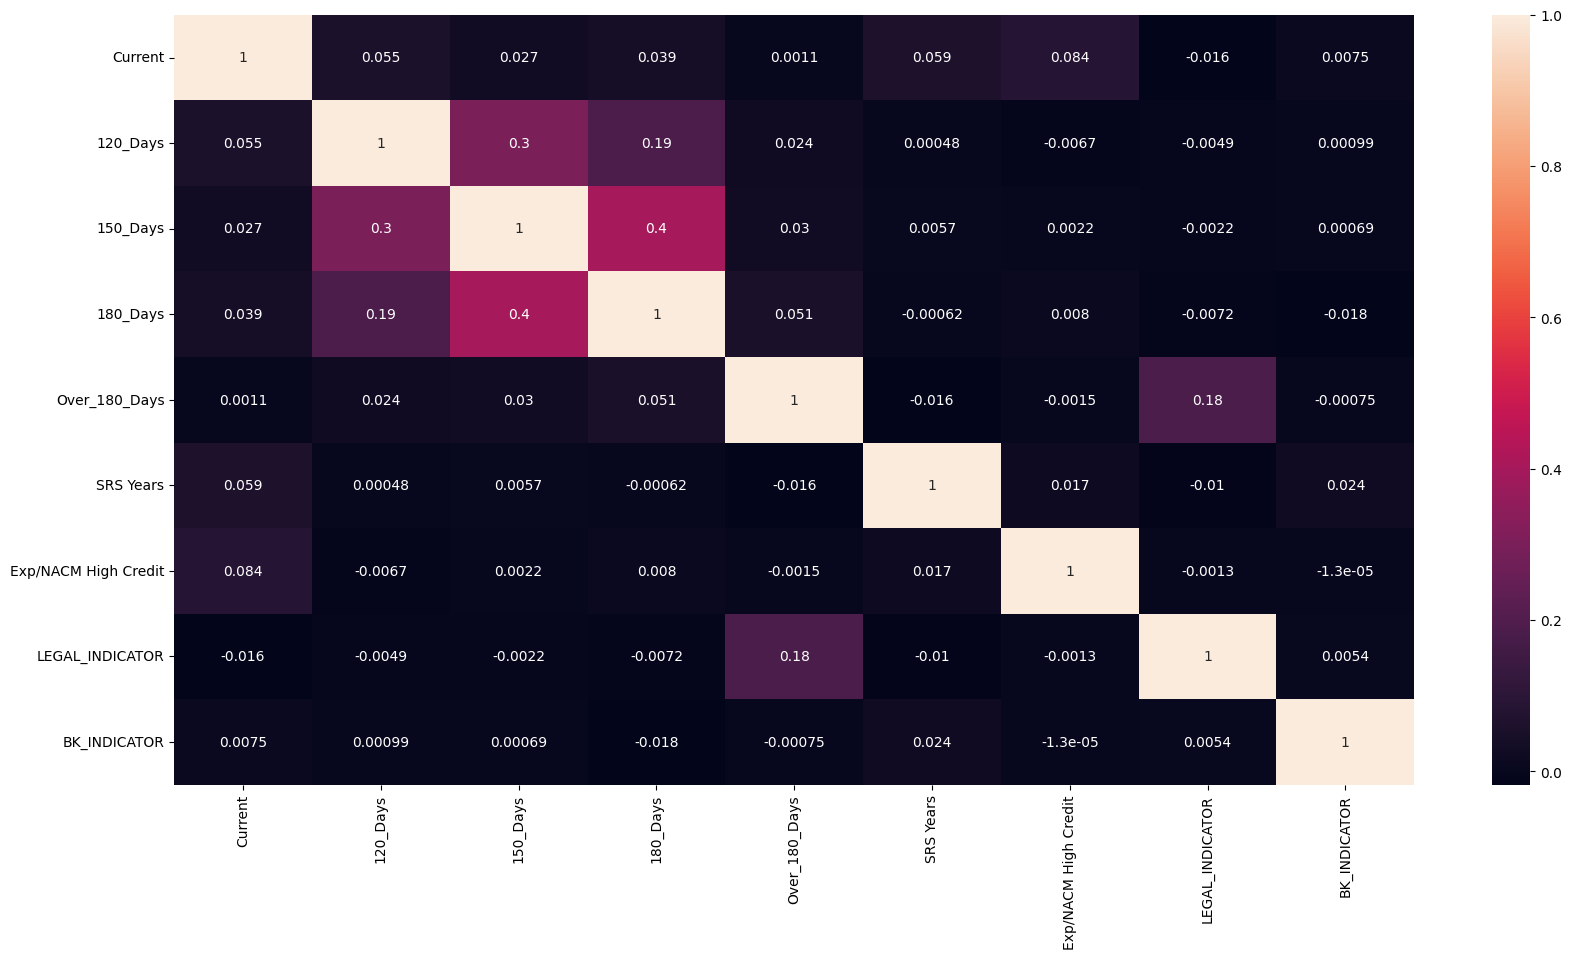

In [ ]:
import seaborn as sns
plt.figure(figsize = (20,10))
ax = sns.heatmap(X.corr(), annot=True)
ax

## CONCLUSION:

The accuracy of this model is 93.8% and a recall of 93%. The accuracy and recall both have reduced in this iteration as compared to the model built in iteration 2. We found out that all variables have an impact on the riskiness of a customer. However, only SRS years is insignificant to the model and can be removed. Future work can be continued on this model by adding and removing other variables.

**How to use model:**

Assume that you want to make a prediction of April.

1. Run this entire file first to train the model.
2. Prepare dataset by extracting  5 columns- 'Current, 120_Days, 150_Days,	180_Days,	Over_180_Days' from the month of January.
3. Add other variables related to customers- 'SRS Years','Exp/NACM high credit', 'Legal Indicator', 'BK Indicator'
3. Remove the 'Cust_Name' column from your dataset. However, maintain a separate list of the cust_id in the same sequence as being given to the model.
4. Run the model on the created dataset by using the following code snippet "predictions = lr3.predict('give your dataset name here')"
5. Join predictions and Cust_Name to see which customers are predicted to go high risk

# FINAL CONCLUSION

The Logistic Regression model developed in Iteration 2, which utilizes 5 data columns and predicts customer behavior 2 months in advance, is found to be the most effective for identifying high-risk customers using AR data alone. In the subsequent Iteration 3, customer-specific information was added to the model to further improve its accuracy. However, the model still requires additional refinement. One potential approach is to experiment with adding or removing variables to determine their impact on the model's performance.

